<h4>Contents of the Notebook:</h4>

<h5>Part1: Exploratory Data Analysis(EDA):</h5><ol>
1)Analysis of the features.
<br>
2)Finding any relations or trends considering multiple features.
</ol>
<h5>Part2: Feature Engineering and Data Cleaning:</h5><ol>
1)Adding any few features.
<br>
2)Removing redundant features.
<br>
3)Converting features into suitable form for modeling.
</ol>
<h5>Part3: Predictive Modeling</h5><ol>
1)Running Basic Algorithms.
<br>
2)Ensembling.
<br>
3)Important Features Extraction.<p></ol>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv("churn.csv")


In [3]:
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [4]:
print("Number of features in the data set:", churn.shape[1])

Number of features in the data set: 21


The dataframe has 21 columns related to telecom user subscription behavior. 

The data fall under two categories:
- 17 Categorical features:
    - CustomerID: Customer ID unique for each customer
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependent: Whether the customer has dependents or not (Yes, No)
    - PhoneService: Whether the customer has a phone service or not (Yes, No)
    - MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two years)
    - PaperlessBilling
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

In [5]:
for col in churn.columns:
    if col not in ['tenure','monthlycharges', 'totalcharges']:
        print(col, churn[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']



    
***
    
- 3 Numerical features:

    - Tenure: Number of months the customer has stayed with the company 
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer
      
***

- Prediction feature:
    - Churn: Whether the customer churned or not (Yes or No)
    
    
These features can also be sub-divided into:

- Demographic customer information

    - gender , SeniorCitizen , Partner , Dependents

- Services that each customer has signed up for

    - PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies, 
    
- Customer account information

    - tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

In [6]:
churn.Churn = churn.Churn == 'Yes'
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

      Churn  
0     False  
1     False  
2      True  
3     False  
4      True  
...     ...  
7038  False  
7039  False  
7040  False  
7041   True  
7042  False  

[7043 rows x 21 columns]

In [7]:
churn = churn.astype({'Churn':int})
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0        0  
1        0  
2        1  
3        0  
4        1  
...    ...  
7038     0  
7039     0  
7040     0  
7041     1  
7042     0  

[7043 rows x 21 columns]

In [8]:
customers = len(churn)
churned_customers = sum(churn['Churn'])

# Print the output below using the "print" function
print("We have %d customers but only %d of them churned (%f%%)" % (customers, churned_customers, (churned_customers/customers*100)))



We have 7043 customers but only 1869 of them churned (26.536987%)


In [9]:
display(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [10]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(col, len(churn[churn[col]== " "]))
    print("-------------------------------------")

tenure 0
-------------------------------------
MonthlyCharges 0
-------------------------------------
TotalCharges 11
-------------------------------------


In [11]:
churn['TotalCharges'] = churn['TotalCharges'].replace({" ": "0.0"}).astype(float)

Notice that the variable “TotalCharges” has the data type “object,” when it should be a numeric column. Let’s convert this column into a numeric one:

In [12]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn['TotalCharges'] = churn['TotalCharges'].fillna(0)

<h4>Missing values.</h4>

How many missing values are in the dataset?

In [13]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
churn.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

<h4>How many churned?</h4>

In [15]:
print(churn['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


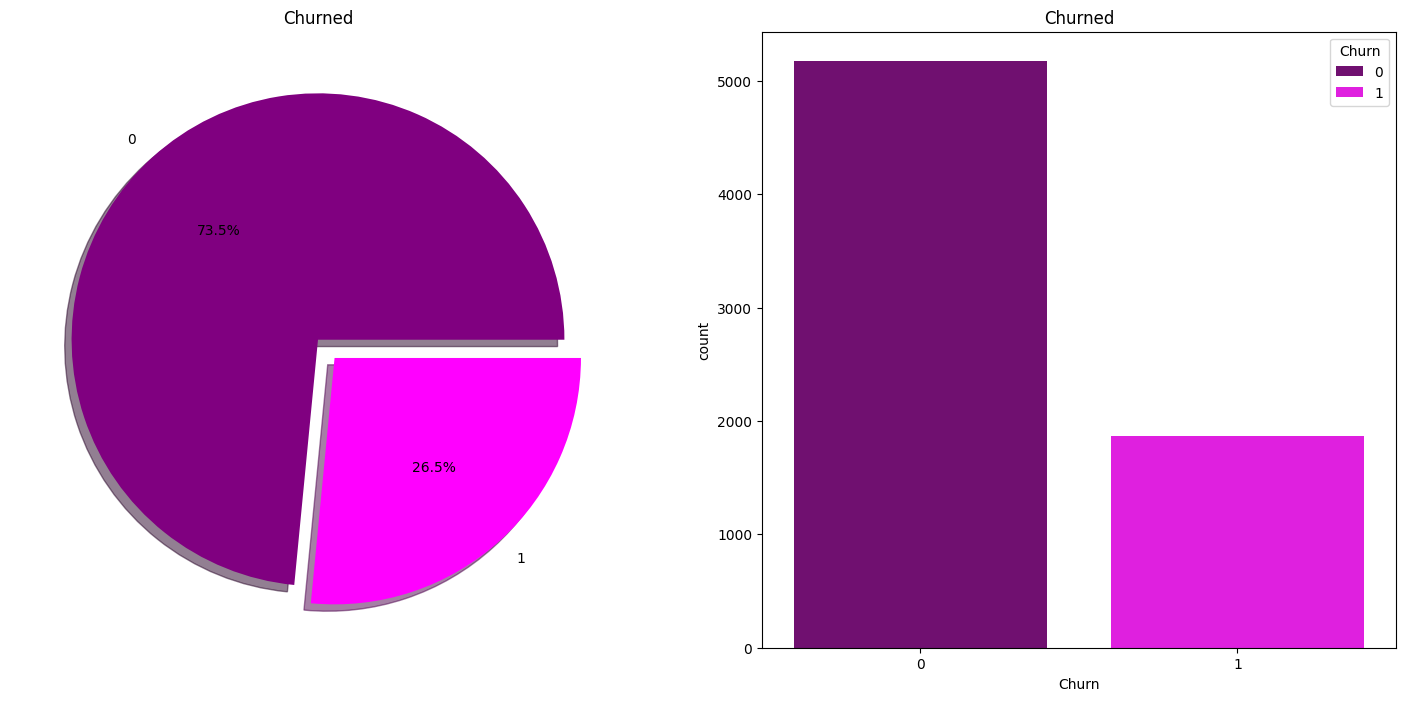

In [20]:

f,ax=plt.subplots(1,2,figsize=(18,8))
churn['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['purple', 'magenta'])
ax[0].set_title('Churned')
ax[0].set_ylabel('')
sns.countplot(churn,x='Churn', hue='Churn', palette=['purple', 'magenta'])
ax[1].set_title('Churned')
plt.show()

- The distribution of the binary classes shows a slight data imbalance that needs attention

We will start by analyzing the demographic data points:

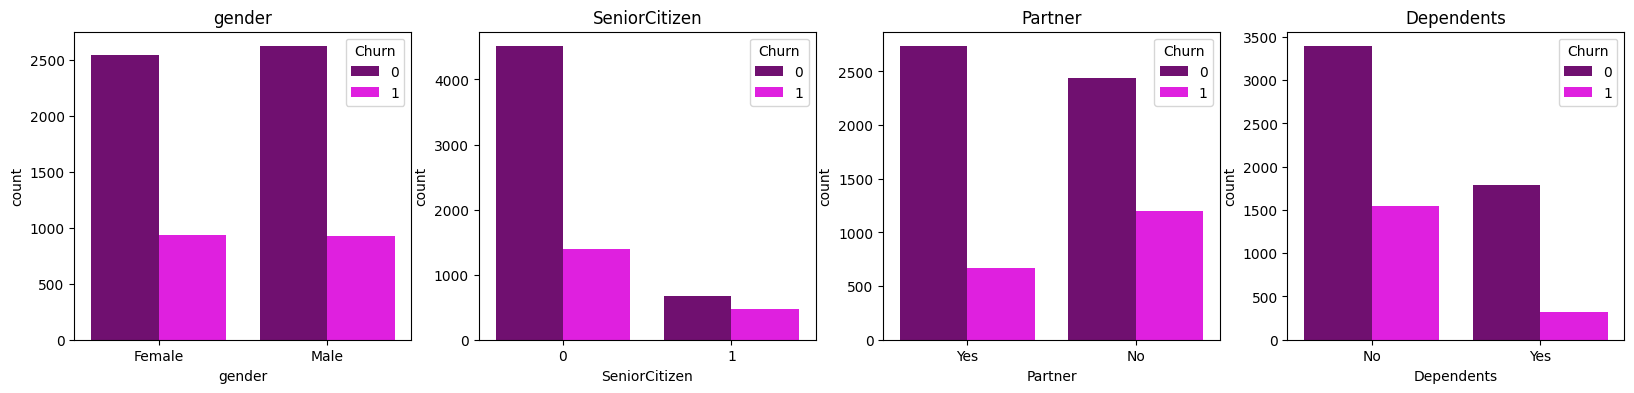

In [19]:
numerical = ['gender','SeniorCitizen',"Partner","Dependents"]


plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=churn, hue='Churn', palette=['purple', 'magenta'])
    ax.set_title(f"{col}")

The disparity in population sizes may lead to the misconception that non-senior citizens are churning more than senior citizens. This is primarily because the non-senior citizen group has a larger representation in the dataset compared to the senior citizen group. However, percentagewise, senior citizens were churning more than non-senior citizens.

People with No “Dependents” seem to churn more that the ones with dependents.

Most customers in the dataset are younger individuals without a dependent. There is an equal distribution of user gender and marital status.

<H4>Numerical features:</H4>

In [21]:
def plot_distribution(churn, column_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(churn[column_name], kde = True,color='purple')
    plt.title(f"Distribution of {column_name}")
    
    col_mean = churn[column_name].mean()
    col_median = churn[column_name].median()
    plt.axvline(col_mean, color='purple', linestyle="--", label="Mean")
    plt.axvline(col_median, color='magenta', linestyle="--", label="Median")
    
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y  = churn[column_name],color='purple')
    plt.title(f"Boxplot of {column_name}")
    plt.show()

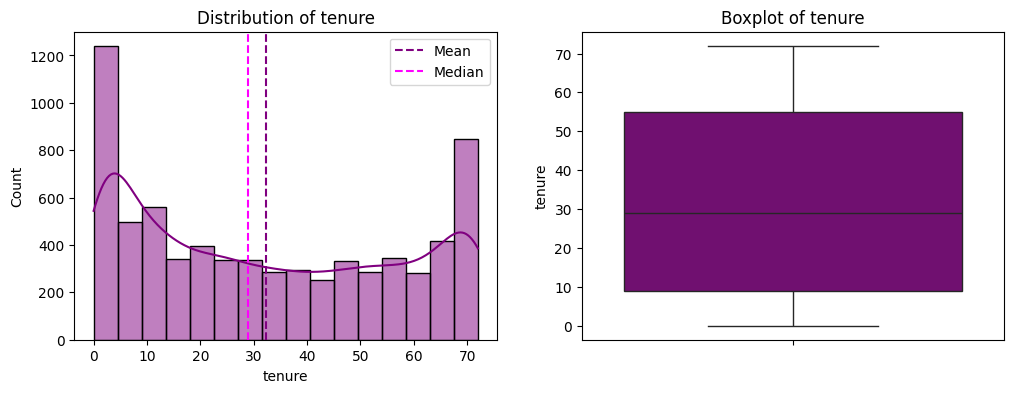

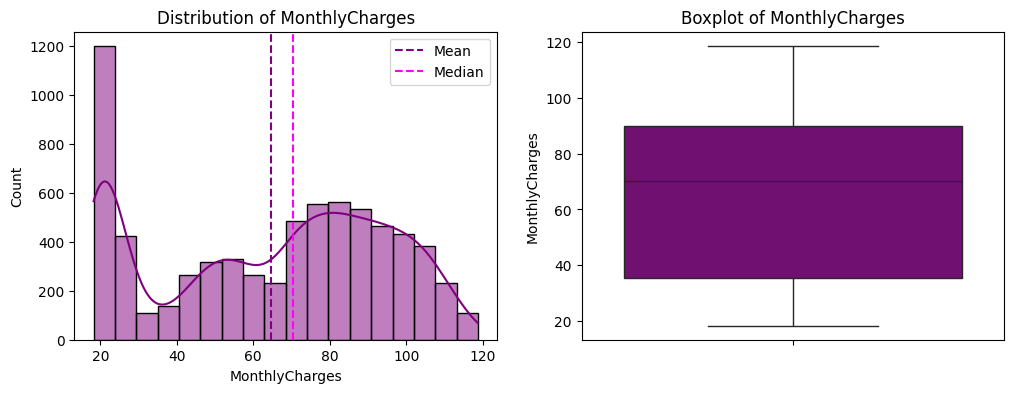

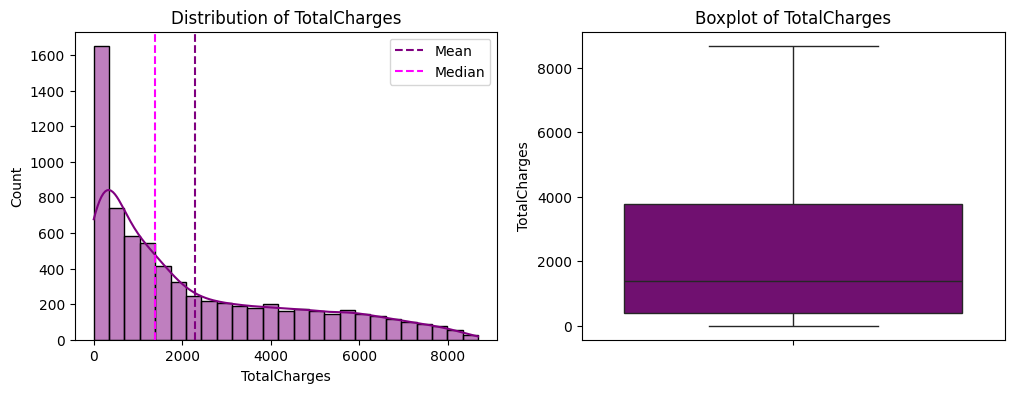

In [22]:
plot_distribution(churn, "tenure")
plot_distribution(churn, "MonthlyCharges")
plot_distribution(churn, "TotalCharges")

- Boxplots show that there are No outliers in the continuous variables
- Histograms show right skewness in the 'TotalCharges' feature

<H3>Correlation between numerical feature</H3>

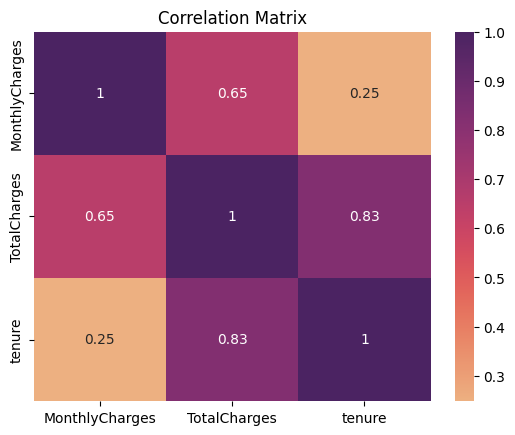

In [23]:
# Check the correlation matrix of all features
columns_for_corr = ["MonthlyCharges", "TotalCharges", "tenure"]
churn_corr = churn[columns_for_corr].corr()
sns.heatmap(churn_corr, annot=True, cmap='flare')
plt.title('Correlation Matrix')
plt.show()

Here are the observations from the correlation matrix:

MonthlyCharges and TotalCharges:

The correlation coefficient is 0.65, indicating a moderate positive correlation. Higher monthly charges tend to be associated with higher total charges.
TotalCharges and Tenure:

The correlation coefficient is 0.83, which shows a strong positive correlation. Customers with a longer tenure are likely to have higher total charges.
MonthlyCharges and Tenure:

The correlation coefficient is 0.25, suggesting a weak positive correlation. There is only a slight tendency for customers with higher monthly charges to have longer tenure.

<h4>Gender distribution and survival.</h4>
    
How distributed the survivors by gender?

In [24]:
churn.groupby('gender').agg({'Churn':['count','sum','mean']})

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

In [25]:
churn.groupby(['gender','Churn'])['Churn'].count()

gender  Churn
Female  0        2549
        1         939
Male    0        2625
        1         930
Name: Churn, dtype: int64

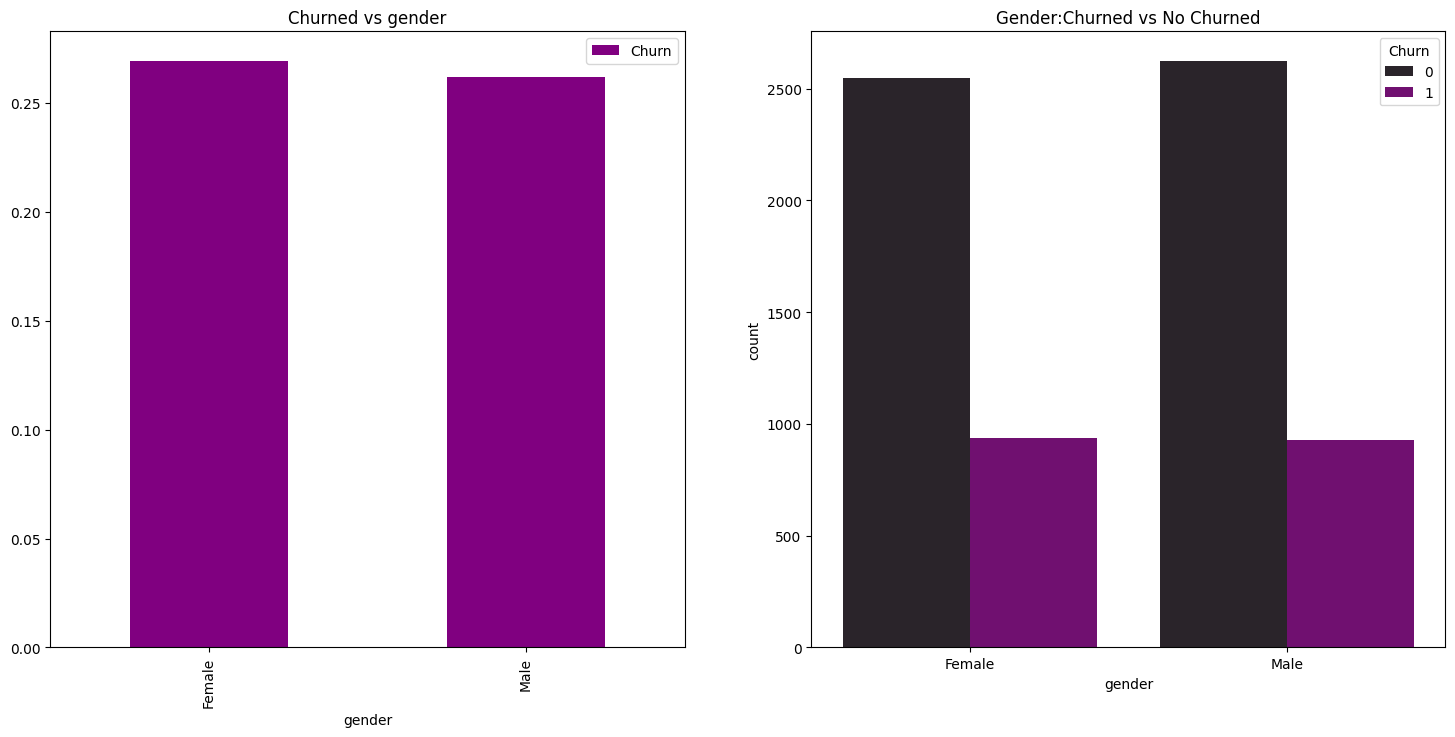

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn[['gender','Churn']].groupby(['gender']).mean().plot.bar(ax=ax[0],color='purple')
ax[0].set_title('Churned vs gender')
sns.countplot(churn,x='gender',hue='Churn',palette='dark:purple')
ax[1].set_title('Gender:Churned vs No Churned')
plt.show()

<p><h4>Customer Distribution and Churn (Right Graph):</h4></p>


<h5>Total number of customers is fairly evenly distributed between genders:</h5><ol>

Female: ~3,400 total customers (2,500 retained + 900 churned)<br>
Male: ~3,500 total customers (2,600 retained + 900 churned)<br></ol>

<h5>Both genders show similar retention patterns:</h5><ol>

Female: ~73% retained, ~27% churned<br>
Male: ~74% retained, ~26% churned<br></ol>

<h5>Key Insights:</h5><ol>

The even distribution of customers suggests no gender bias in customer acquisition.<br>
Similar churn rates indicate that service quality and customer satisfaction are consistent across genders.<br>
Current practices appear to be gender-neutral in their effectiveness.<br></ol>

<h4>Tenure distribution and churn.</h4>
    
Plot the Tenure frequencies of the customers. (use an histogram)

In [27]:
churn['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

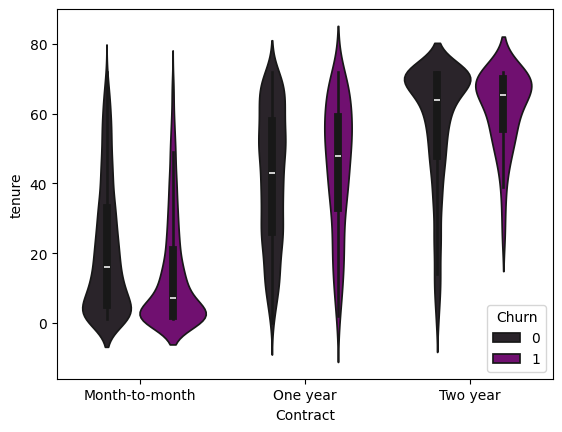

In [28]:

sns.violinplot(data=churn, x="Contract",y="tenure", hue="Churn",palette='dark:purple')
plt.show()

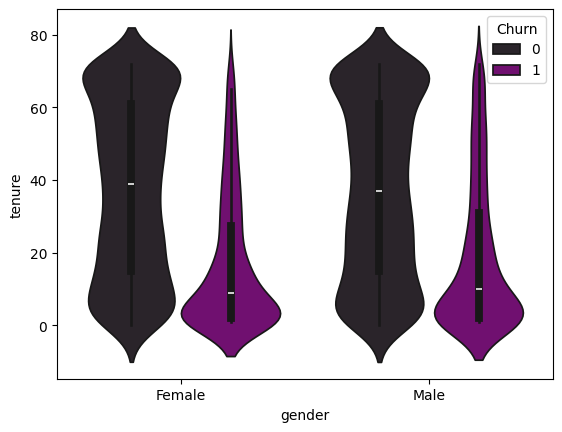

In [29]:
sns.violinplot(data=churn, x="gender",y="tenure", hue="Churn",palette='dark:purple')

plt.show()


<h4>Churn Risk Patterns:</h4><ol>


Early tenure periods (0-6 months) show highest churn risk.<br>
Risk of churn decreases as tenure increases.<br>
This pattern is consistent across gender and contract types.<br></ol>

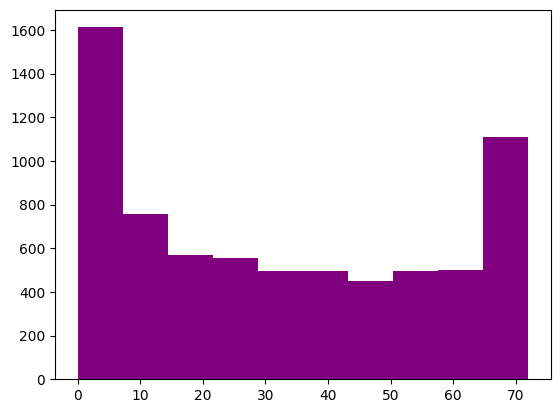

In [30]:
plt.hist(churn['tenure'].dropna(),color='purple')
plt.show()

Text(0.5, 1.0, 'Tenure Distribution of the Customers')

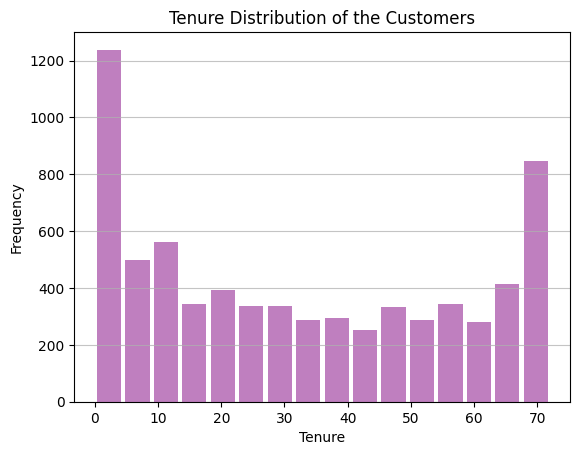

In [31]:
plt.hist(x=churn['tenure'].dropna(), bins='auto',color='purple',alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution of the Customers')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\3972797558.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['tenure'].dropna())


<Axes: xlabel='tenure', ylabel='Density'>

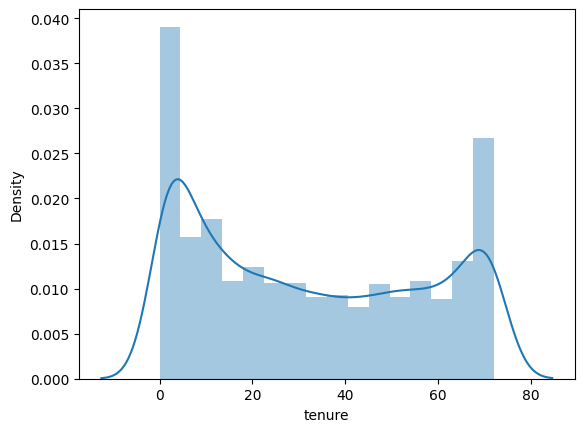

In [32]:
sns.distplot(churn['tenure'].dropna())

<h4>Key Observations:</h4>

<h5>Distribution Pattern:</h5><ol>

Bimodal distribution with two distinct peaks!<br>
First peak: At 0-5 months with approximately 1,200 customers.<br>
Second peak: At around 70 months with approximately 850 customers.<br>
Valley in the middle: Relatively consistent numbers between 20-60 months (around 300-400 customers per interval).<br></ol>

<h5>Specific Features:</h5><ol>

Sharp drop after the initial 0-5 month period.<br>
Relatively steady distribution in middle tenure periods<br>
Significant increase in the 65-70 month range.<br></ol>

<h5>Customer Lifecycle Patterns:</h5><ol>

High initial customer acquisition but potential early retention challenges.<br>
Those who survive the early period tend to stay long-term.<br>
Strong loyalty among long-term customers.<br></ol>

### <h4>Tenure Group distribution and churn.</h4>

Create a new variable (column) that will divide the customers in 3 tenure categories:<ol>

New: 0-6<br>
Active/Regular: 7-64<br>
VIP/Premium: 65-...<br></ol>

How many (number and percent) churn on each age group? (We will use the mean function as the percentage).

One way to solve this is:

In [33]:
churn['TenureGroup'] = None
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  TenureGroup  
0           Electronic check          29.85        29.85      0         None  
1               Mailed check          56.95      1889.50      0         None  
2               Mailed check          53.85       108.15      1         None  
3  Bank transfer (automatic)          42.30      1840.75      0         None  
4           Electronic check          70.70       151.65      1         None  

[5 rows x 22 columns]

In [34]:
churn.loc[(churn['tenure'] < 7),'TenureGroup'] = '0-6'
churn.loc[(churn['tenure'] >=7.) &(churn['tenure'] < 64),'TenureGroup'] = '7-64'
churn.loc[(churn['tenure'] >= 65.),'TenureGroup'] = '65+'
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7038         Yes         Yes             Yes        One year              Yes   
7039          No         Yes             Yes        One year              Yes   
7040          No          No              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   
7042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85      0   
1                  Mailed check          56.95      1889.50      0   
2                  Mailed check          53.85       108.15      1   
3     Bank transfer (automatic)          42.30      1840.75      0   
4              Electronic check          70.70       151.65      1   
...                         ...            ...          ...    ...   
7038               Mailed check          84.80      1990.50      0   
7039    Credit card (automatic)         103.20      7362.90      0   
7040           Electronic check          29.60       346.45      0   
7041               Mailed check          74.40       306.60      1   
7042  Bank transfer (automatic)         105.65      6844.50      0   

      TenureGroup  
0             0-6  
1            7-64  
2             0-6  
3            7-64  
4             0-6  
...           ...  
7038         7-64  
7039          65+  
7040         7-64  
7041          0-6  
7042          65+  

[7043 rows x 22 columns]

In [35]:
churn.groupby('TenureGroup').agg({'Churn':['count','sum','mean']})

Churn                
            count   sum      mean
TenureGroup                      
0-6          1481   784  0.529372
65+          1109    72  0.064923
7-64         4373  1009  0.230734

<h4>Tenure-Gender Churn.</h4>

Where there differences on Churn by Tenure group and gender?

In [36]:
churn['TenureGroup'].value_counts().to_frame().style.background_gradient(cmap='summer')

In [37]:
churn.groupby(['gender','TenureGroup']).agg({'Churn':['count',sum,'mean']})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\1205056473.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  churn.groupby(['gender','TenureGroup']).agg({'Churn':['count',sum,'mean']})


Churn               
                   count  sum      mean
gender TenureGroup                     
Female 0-6           735  405  0.551020
       65+           532   24  0.045113
       7-64         2179  507  0.232676
Male   0-6           746  379  0.508043
       65+           577   48  0.083189
       7-64         2194  502  0.228806

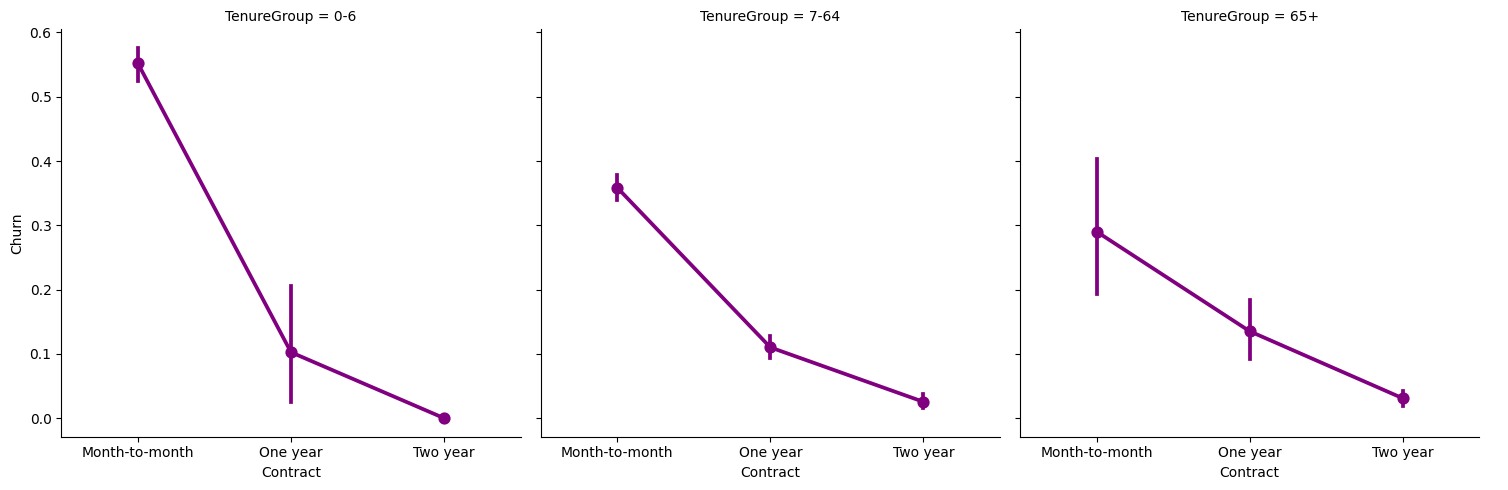

In [38]:
sns.catplot(data=churn,x='Contract',y='Churn',col='TenureGroup',  kind="point",color='purple')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\2842318559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn,x='TenureGroup',ax=ax[0,0],palette='dark:purple')


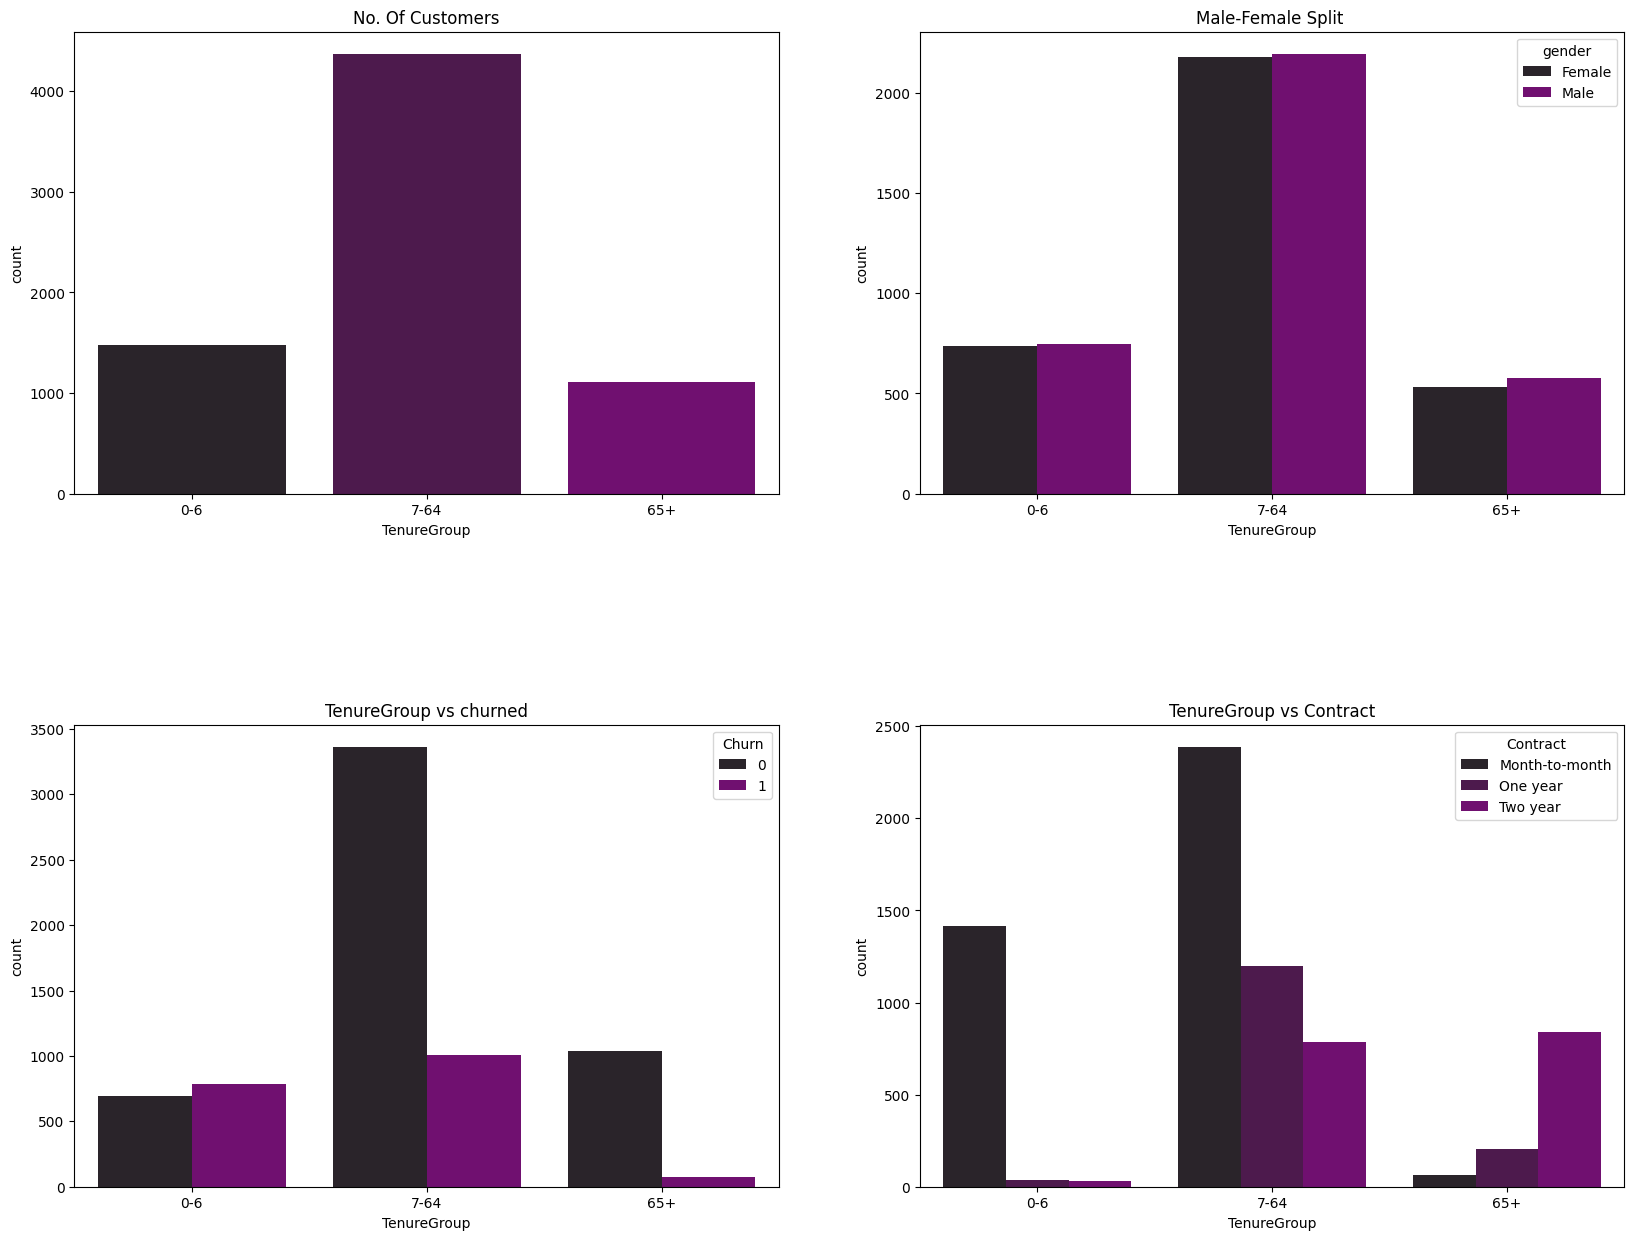

In [41]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(data=churn,x='TenureGroup',ax=ax[0,0],palette='dark:purple')
ax[0,0].set_title('No. Of Customers')
sns.countplot(data=churn,x='TenureGroup',hue='gender',ax=ax[0,1],palette='dark:purple')
ax[0,1].set_title('Male-Female Split ')
sns.countplot(data=churn,x='TenureGroup', hue='Churn',ax=ax[1,0],palette='dark:purple')
ax[1,0].set_title('TenureGroup vs churned')
sns.countplot(data=churn,x='TenureGroup',hue='Contract',ax=ax[1,1],palette='dark:purple')
ax[1,1].set_title('TenureGroup vs Contract')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

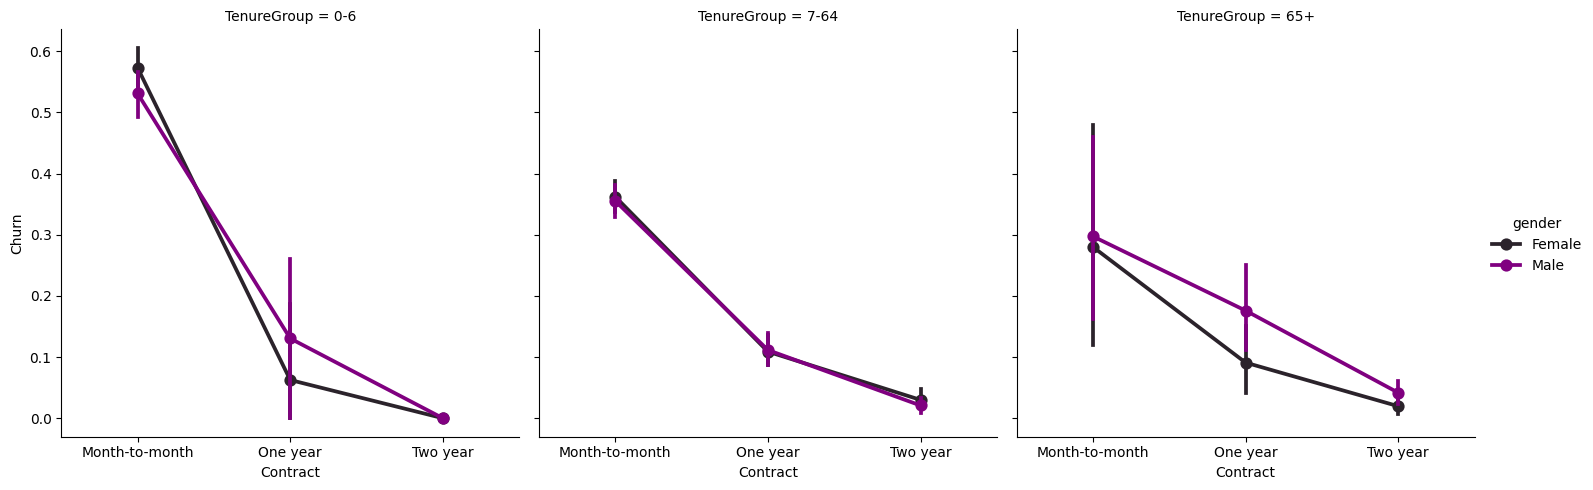

In [42]:
sns.catplot(x='Contract',y='Churn',hue='gender',col='TenureGroup',data=churn, kind="point",palette='dark:purple')
plt.show()

<h3>Key Observations:</h3>

<h4>Tenure Groups vs Churn (Left Graph):</h4>

<h5>New Customers (0-6 months):</h5><ol>

Almost equal churn vs retention (~700 each).
<p>Highest churn rate among all groups (~50%).
<p>Most vulnerable customer segment.</ol>

<h5>Active/Regular Customers (7-64 months):</h5><ol>

Significantly better retention (~3,300 retained vs ~1,000 churned).
<p>~23% churn rate.
<p>Largest customer segment overall.</ol>

<h5>VIP/Premium Customers (65+ months):</h5><ol>

Best retention rates (~1,000 retained vs ~100 churned).
<p>Very low churn rate (~9%).
<p>Strong loyalty in this segment.</ol>


<h4>Tenure Groups vs Contract Types (Right Graph):</h4>

<h5>New Customers (0-6 months):</h5><ol>

Dominated by month-to-month contracts (~1,400).
<p>Very few one-year or two-year contracts.
<p>Suggests customers prefer starting with flexible arrangements.</ol>

<h5>Active/Regular Customers (7-64 months):</h5><ol>

Highest number of month-to-month contracts (~2,300).
<p>Significant one-year contracts (~1,200).
<p>Good number of two-year contracts (~800).
<p>Most diverse mix of contract types.</ol>

<h5>VIP/Premium Customers (65+ months):</h5><ol>

Dominated by two-year contracts (~800).
<p>Some one-year contracts (~200).
<p>Very few month-to-month contracts (~100).
<p>Clear preference for longer commitments.</ol>

<h4>Customer Evolution:</h4><ol>

New customers start with flexible contracts but have highest churn risk
<p>As tenure increases, customers tend to shift toward longer contracts
<p>Long-term customers strongly prefer longer contracts and show highest loyalty</ol>

<h4>PaymentMethod	 and Churned customers.</h4>

Was there any difference?

In [43]:
churn.groupby('PaymentMethod').agg({'Churn':['count',sum,'mean']})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\1219062284.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  churn.groupby('PaymentMethod').agg({'Churn':['count',sum,'mean']})


Churn                
                          count   sum      mean
PaymentMethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

In [45]:
pd.crosstab([churn.Contract,churn.PaymentMethod],[churn.gender,churn.Churn],margins=True).style.background_gradient(cmap='plasma')

Key insights from the data:

The data shows payment method usage across gender and contract length.

Key findings:

Electronic check is the most common payment method overall, used by over 2,500 customers.<br>
Bank transfer (automatic) is the second most common, used by around 1,600 customers.<br>
Credit card (automatic) usage is lower, around 550 customers.<br>
Mailed check is the least common, used by around 400 customers.<br>
Usage patterns are relatively consistent across gender, with some minor variations.<br>
For longer contract lengths (1-2 years), electronic check and automatic bank transfer are more common than credit card.<br>

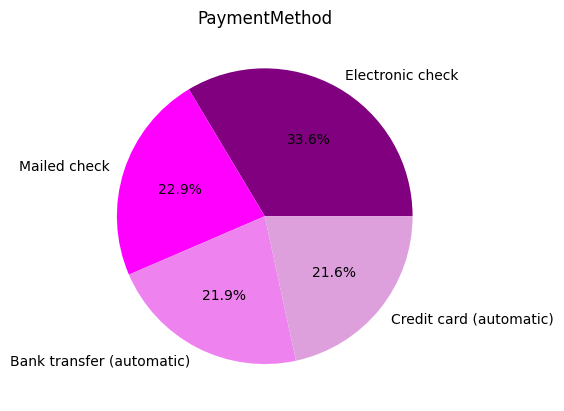

In [46]:
churn['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['purple', 'magenta', 'violet', 'plum'])
plt.title('PaymentMethod')
plt.ylabel('')
plt.show()

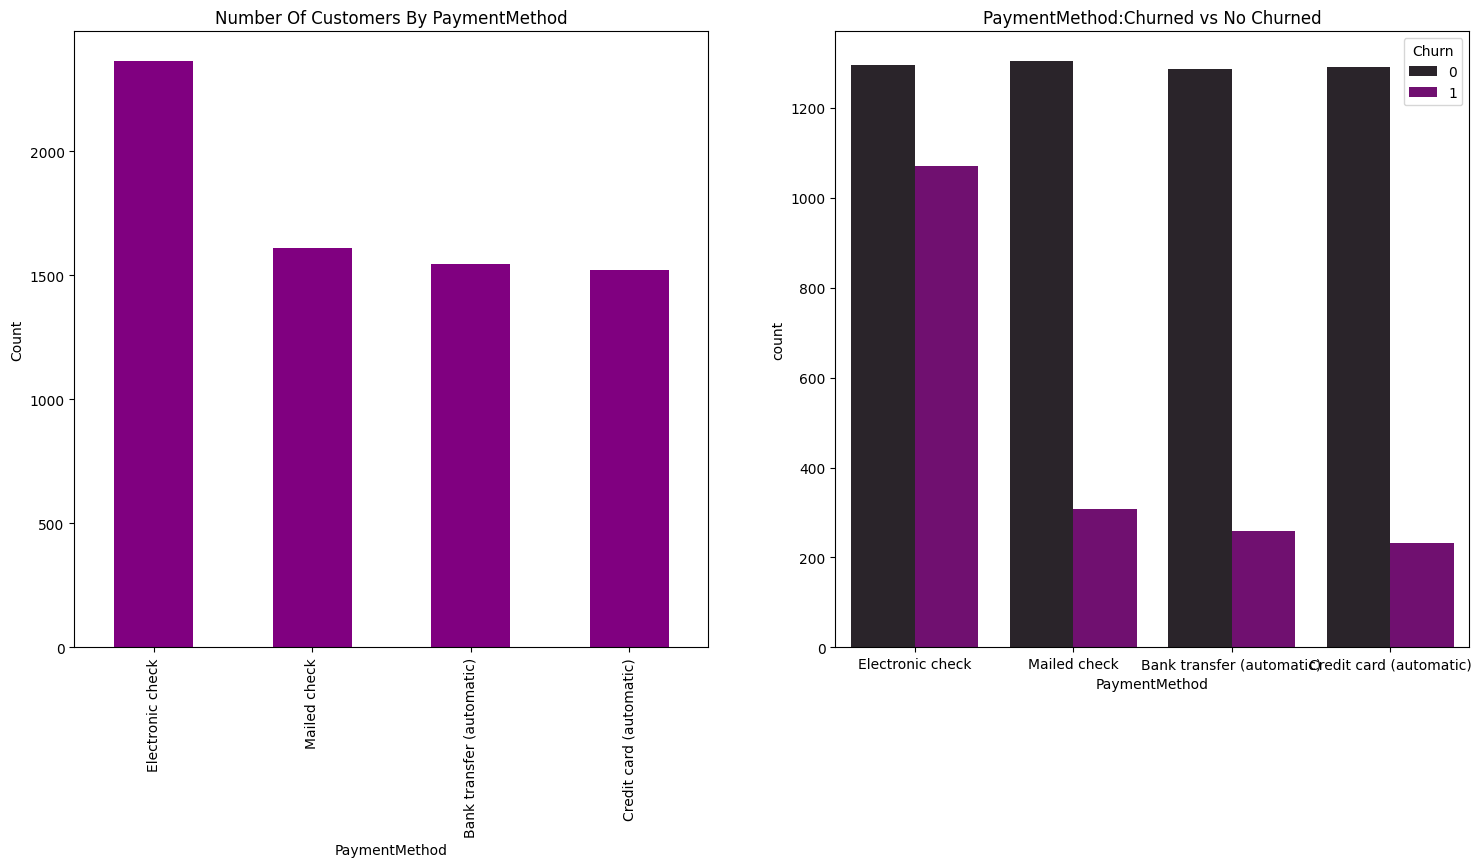

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn['PaymentMethod'].value_counts().plot.bar(color='purple',ax=ax[0])
ax[0].set_title('Number Of Customers By PaymentMethod')
ax[0].set_ylabel('Count')
sns.countplot(churn,x='PaymentMethod',hue='Churn',palette='dark:purple')
ax[1].set_title('PaymentMethod:Churned vs No Churned')
plt.show()

Based on the graphs, the key factors contributing to customer churn appear to be:

1.Payment method: Customers using electronic check have the highest churn rate, around 1000 churned customers compared to lower churn for other payment methods.<br>

2.Specific to the electronic check payment, the number of customers using this method is also significantly higher than other options. <br>
This combination of high usage and high churn suggests this payment method may be a major driver of overall churn.<br>

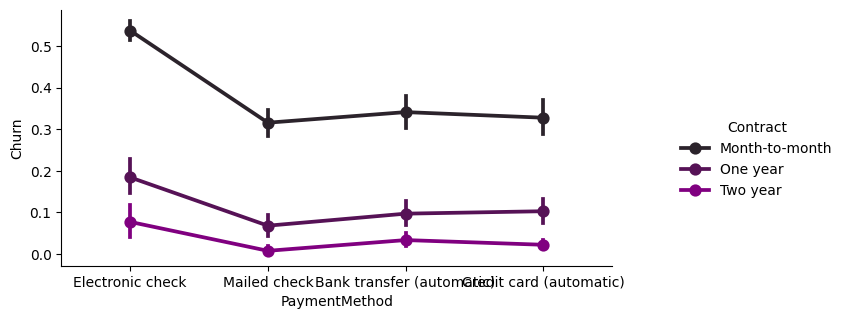

In [48]:
sns.catplot(data=churn , x='PaymentMethod',hue='Contract',y='Churn', kind="point",palette='dark:purple')

fig=plt.gcf()
fig.set_size_inches(9,3)
plt.show()

<H5>Key insights:</H5>

Based on the graph, the churn rate appears to depend significantly on the payment method used by customers. :

<H5>Electronic Check:</H5>
This method has the highest churn rate, around 0.40.<br>
<H5>Mailed Check:</H5>
Churn is significantly lower but still higher than automated methods, around 0.20.<br>
<H5>Bank Transfer (Automatic) and Credit Card (Automatic):</H5>
These methods show the lowest churn rates. Automated payments are generally more convenient, secure, and reliable, around 0.15.<br>
The pattern is consistent across the different payment method types, suggesting a clear user preference for simpler, more convenient payment options.<br>
The steep drop-off in usage from electronic check to other methods indicates a significant user preference for the simplicity of electronic check payments.<br>
The relatively low usage of automatic bank transfer and credit card payments, despite their convenience, suggests users may be more hesitant to provide direct access to their financial accounts.<br>
The data implies that payment method design and user experience are important factors in driving customer adoption and usage. Optimizing for the most convenient and straightforward payment options could lead to higher usage and customer satisfaction.<br>

<h4>TotalCharges and Churned customers.</h4>

Was there any difference?

In [49]:
churn['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\2074905788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn['Contract']=='Month-to-month'].TotalCharges,color='purple',ax=ax[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\2074905788.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

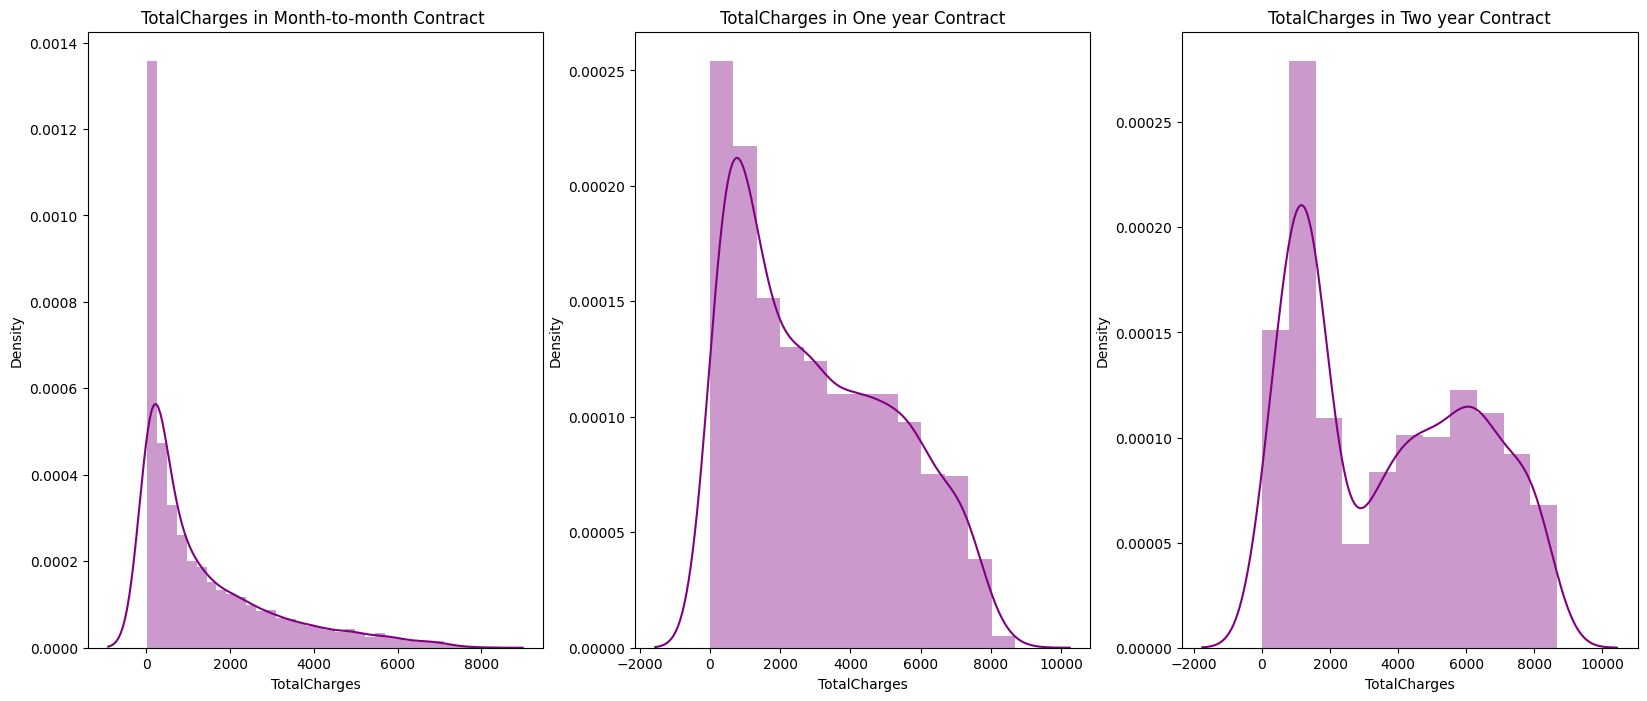

In [51]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(churn[churn['Contract']=='Month-to-month'].TotalCharges,color='purple',ax=ax[0])
ax[0].set_title('TotalCharges in Month-to-month Contract ')
sns.distplot(churn[churn['Contract']=='One year'].TotalCharges,color='purple',ax=ax[1])
ax[1].set_title('TotalCharges in One year Contract')
sns.distplot(churn[churn['Contract']=='Two year'].TotalCharges,color='purple',ax=ax[2])
ax[2].set_title('TotalCharges in Two year Contract')
plt.show()

<h5>Month-to-Month:</h5>
<ol>
Right-skewed distribution, median ~$1,500.<br></ol>
<h5>1-Year:</h5>

Bimodal distribution, peaks around 1,000  doll. and    6,000 doll. <br>
Indicates distinct customer segments.<br></ol>

<h5>2-Year: </h5>
<ol>
Also bimodal, similar peaks at $1,000 and $6,000. Suggests common segmentation across contract lengths.<br></ol>
<h4>Key insights:</h4>
<ol>
Month-to-month charges more consistent <br>
1/2-year more dispersed<br>
1-year and 2-year show two main customer groups based on charges<br></ol>

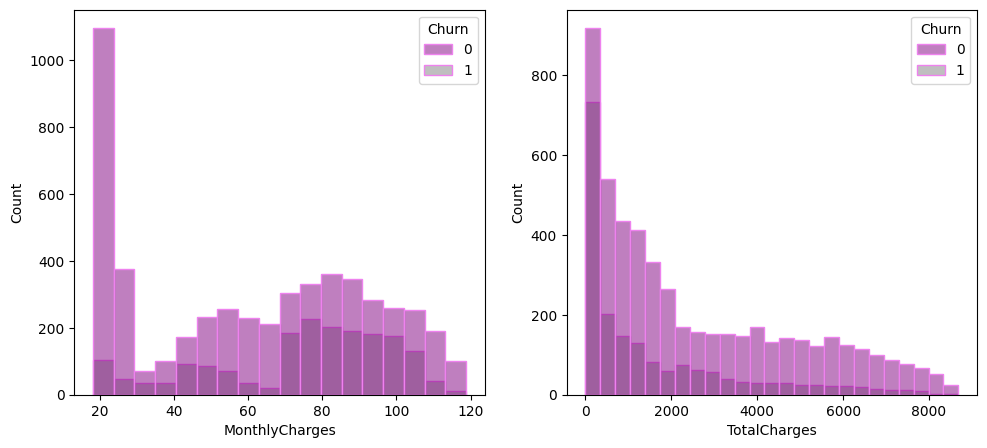

In [52]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 2)
_ = sns.histplot(x='MonthlyCharges', hue='Churn', palette=['purple', 'grey'], edgecolor='violet', data=churn)
plt.subplot(1, 3, 3) 
_ = sns.histplot(x='TotalCharges', hue='Churn', palette=['purple', 'grey'], edgecolor='violet', data=churn)

Analysis of Churn Based on Monthly Charges and Total Charges:
 Monthly Charges vs. Churn Observation:

Churn is more prevalent among customers with higher monthly charges.
Customers with low monthly charges (<$30) have a significantly lower churn rate.

 Total Charges vs. Churn Observation:

Churn is higher among customers with lower total charges.
This indicates that new customers (those with low tenure) are more likely to churn.

How many individuals didn't paid ?

In [53]:
print(len(churn[churn['TotalCharges']==0]))

11


<h4>MonthlyCharges and Churned customers.</h4>

Was there any difference?

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

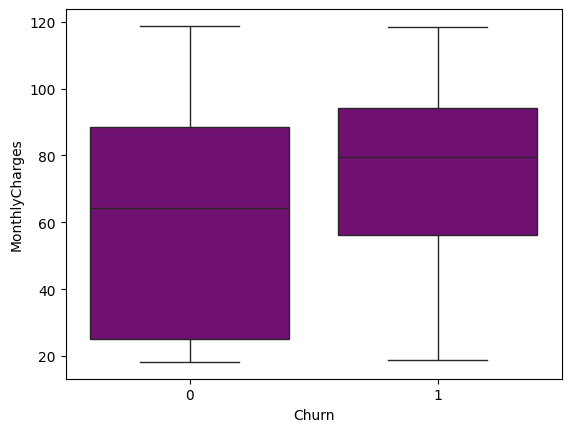

In [54]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn,color='purple')

Customers who churned have a higher median monthly charge than customers who renewed their subscription.

In [55]:
churn['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<h4>Where there differences in MonthlyCharges rates among the same Contracts?</h4>

In [57]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000
mean        0.162147    32.371149       64.761692   2279.734304     0.265370
std         0.368612    24.559481       30.090047   2266.794470     0.441561
min         0.000000     0.000000       18.250000      0.000000     0.000000
25%         0.000000     9.000000       35.500000    398.550000     0.000000
50%         0.000000    29.000000       70.350000   1394.550000     0.000000
75%         0.000000    55.000000       89.850000   3786.600000     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000

In [58]:
byContract = churn.groupby('Contract')
byContract

In [59]:
byContract['TotalCharges'].describe()

count         mean          std    min       25%      50%  \
Contract                                                                     
Month-to-month  3875.0  1369.254581  1613.879008  18.85   160.100   679.55   
One year        1473.0  3032.622878  2230.374581   0.00   989.050  2656.70   
Two year        1695.0  3706.934336  2579.517834   0.00  1269.675  3593.80   

                    75%      max  
Contract                          
Month-to-month  2066.50  8061.50  
One year        4859.25  8684.80  
Two year        5988.80  8672.45

In [60]:
byContract['MonthlyCharges'].describe()

count       mean        std    min     25%    50%     75%  \
Contract                                                                     
Month-to-month  3875.0  66.398490  26.926599  18.75  45.850  73.25  88.875   
One year        1473.0  65.048608  31.840539  18.25  26.900  68.75  94.800   
Two year        1695.0  60.770413  34.678865  18.40  24.025  64.35  90.450   

                   max  
Contract                
Month-to-month  117.45  
One year        118.60  
Two year        118.75

<h5>Definitely YES,
we can see that customers with the same contracts paid different MonthlyCharges rates.</h5>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\3026822722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn['Contract']=='Month-to-month'].MonthlyCharges,color='purple',ax=ax[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\3026822722.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

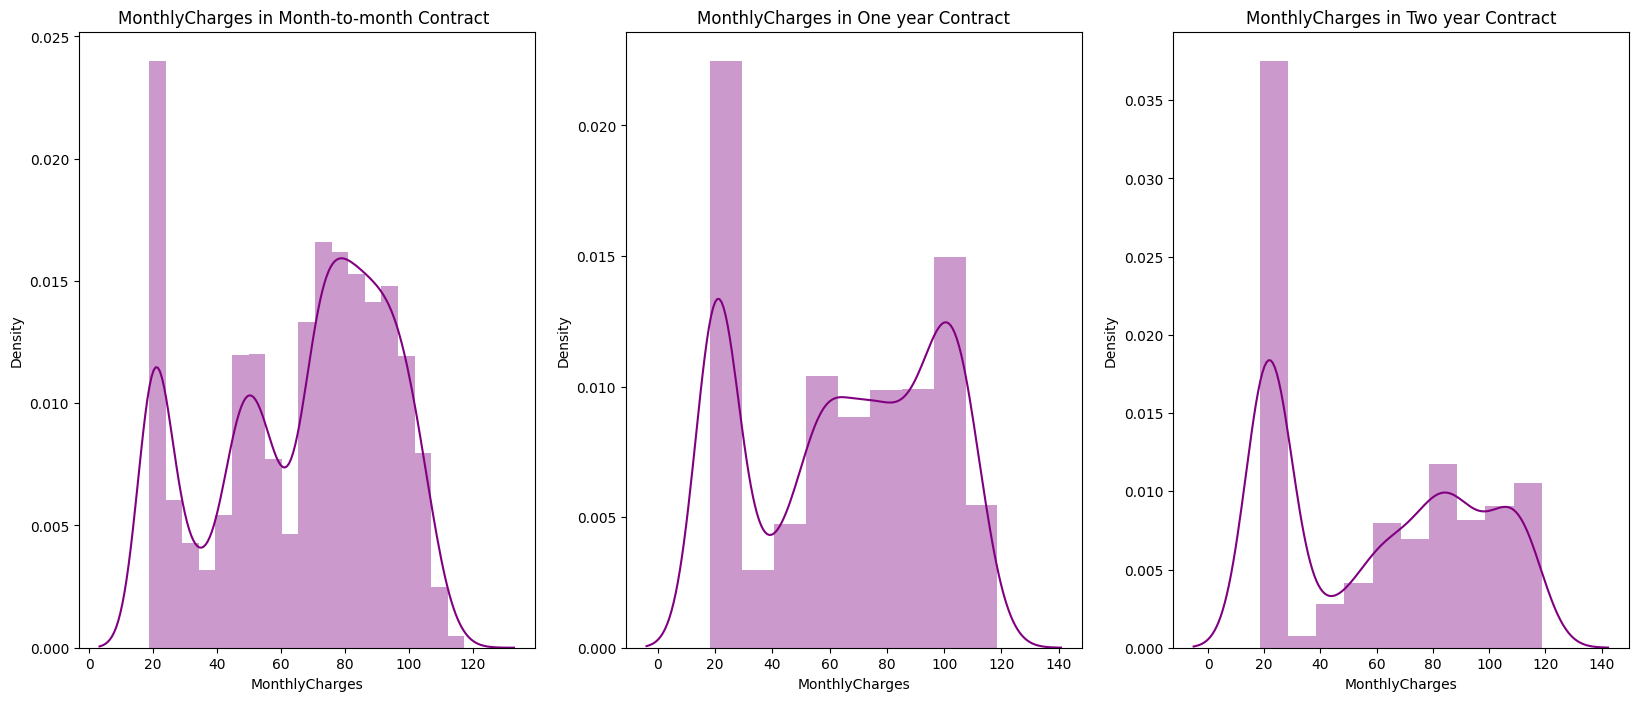

In [61]:
churn['MonthlyCharges'] = churn['MonthlyCharges'].astype(float)
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(churn[churn['Contract']=='Month-to-month'].MonthlyCharges,color='purple',ax=ax[0])
ax[0].set_title('MonthlyCharges in Month-to-month Contract ')
sns.distplot(churn[churn['Contract']=='One year'].MonthlyCharges,color='purple',ax=ax[1])
ax[1].set_title('MonthlyCharges in One year Contract')
sns.distplot(churn[churn['Contract']=='Two year'].MonthlyCharges,color='purple',ax=ax[2])
ax[2].set_title('MonthlyCharges in Two year Contract')
plt.show()

<h5>Month-to-Month:</h5>

<ol>Right-skewed distribution, median around $20.<br></ol>

<h5>1-Year: </h5>

<ol>Bimodal distribution, peaks around $20 and $100. <br>
Indicates distinct customer segments.<br></ol>

<h5>2-Year:</h5>

<ol>Also bimodal, similar peaks at $20 and $100. Suggests common segmentation across contract lengths.<br></ol>

<h5>Key insights:</h5>
<ol>
Month-to-month charges more consistent, 1/2-year more dispersed.<br>
1-year and 2-year show two main customer groups based on charges.<br>
Understanding these charge distribution patterns could provide valuable business insights.<br></ol>

**Scatter plot of Monthly Charges versus Total Charges**

I performed a scatterplot analysis to see how monthly charges varied with total charges, and from the plot below, we can see both attributes have a positive relationship.

In simple terms: This means as monthly charges increase the total charges increase. Also, we can see that as total charges increase churn (the orange dots) becomes less.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

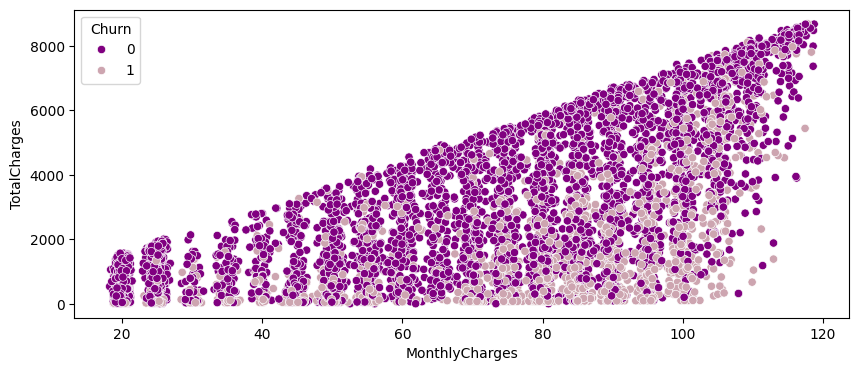

In [62]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=churn, x='MonthlyCharges', y='TotalCharges',palette=['purple', '#CDA5B0'], hue='Churn')

- This implies a positive correlation between the monthly charges, and total charges.
- The churn rate increases with the increase in monthly charges.

<H3>Contract</H3>

In [63]:
pd.crosstab(churn.Contract,churn.Churn,margins=True).style.background_gradient(cmap='plasma')

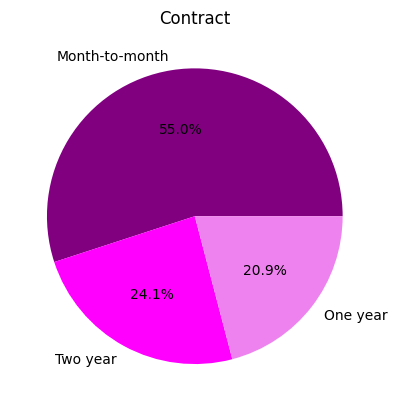

In [64]:
churn['Contract'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['purple', 'magenta', 'violet'])
plt.title('Contract')
plt.ylabel('')
plt.show()

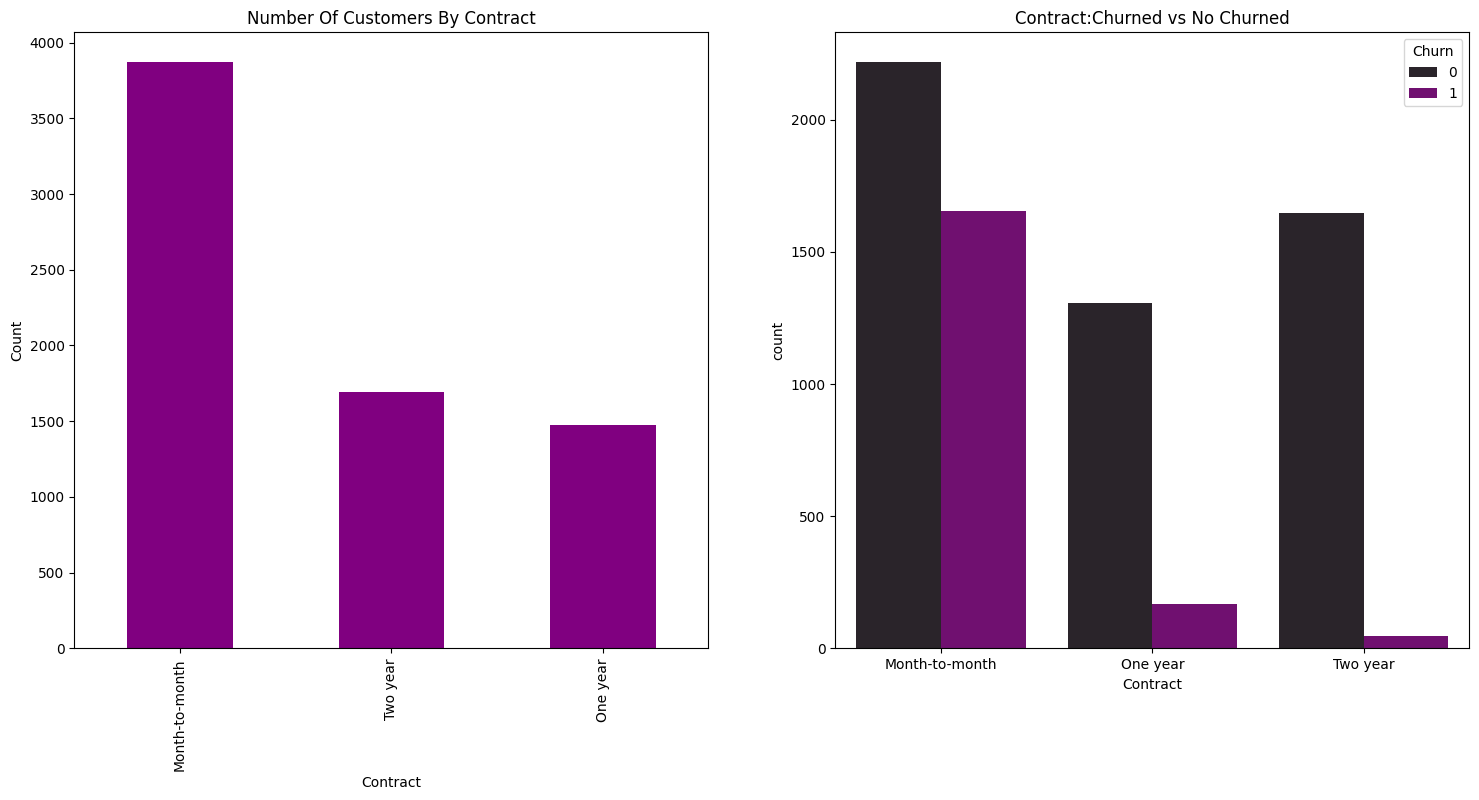

In [67]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn['Contract'].value_counts().plot.bar(color='purple',ax=ax[0])
ax[0].set_title('Number Of Customers By Contract')
ax[0].set_ylabel('Count')
sns.countplot(churn,x='Contract',hue='Churn',palette='dark:purple')
ax[1].set_title('Contract:Churned vs No Churned')
plt.show()

Based on the graphs provided, there are a few key insights that could explain why people churn:

Month-to-month contracts have a much higher churn rate compared to longer-term contracts. The churn for month-to-month is around 1500, while for one-year and two-year contracts it drops significantly to under 500.

The number of customers on month-to-month contracts is also much higher, over 3000, compared to the longer-term contracts. This suggests month-to-month customers are more likely to churn.

For the longer-term one-year and two-year contracts, the churn is still relatively high, around 500 customers. This indicates there may be other factors beyond just contract length that contribute to customer churn.

In summary, the key driver of churn appears to be the prevalence of month-to-month contracts, where customers are more likely to cancel their service. Addressing the high churn on these short-term contracts could be an important area to focus on to reduce overall customer churn.

Observation: Generally, churners were paying more total charges than non-churners

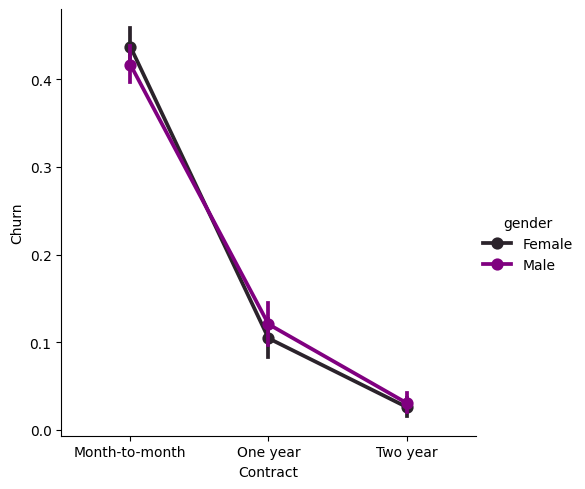

In [68]:
sns.catplot(x='Contract',y='Churn',hue='gender',data=churn,kind="point",palette='dark:purple')
plt.show()



<h5>Contract Length vs. Customer Retention:</h5><ol>

Longer contracts strongly correlate with better retention rates.<br>
The month-to-month flexibility comes at the cost of higher churn.<br>
Two-year contracts show the best retention performance.</ol>

<h5>Business Implications:</h5>
<ol>

While month-to-month contracts are popular, they represent the highest risk for customer loss.<br>
Longer contracts appear to be an effective tool for reducing churn.<br>
There may be an opportunity to incentivize customers to switch to longer contracts.<br><ol>

<h4>Partner</h4>

Discrete Feature

pd.crosstab([churn.Partner],churn.Churn).style.background_gradient(cmap='plasma')

In [69]:
pd.crosstab(churn.Partner,churn.Contract).style.background_gradient(cmap='plasma')

<h4>SeniorCitizen</h4>

In [70]:
pd.crosstab([churn.SeniorCitizen],churn.Churn).style.background_gradient(cmap='plasma')


In [71]:
pd.crosstab(churn.SeniorCitizen,churn.Contract).style.background_gradient(cmap='plasma')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\1208609457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Partner', y='Churn', data=churn, palette=['purple', '#CDA5B0'], ax=ax[0])


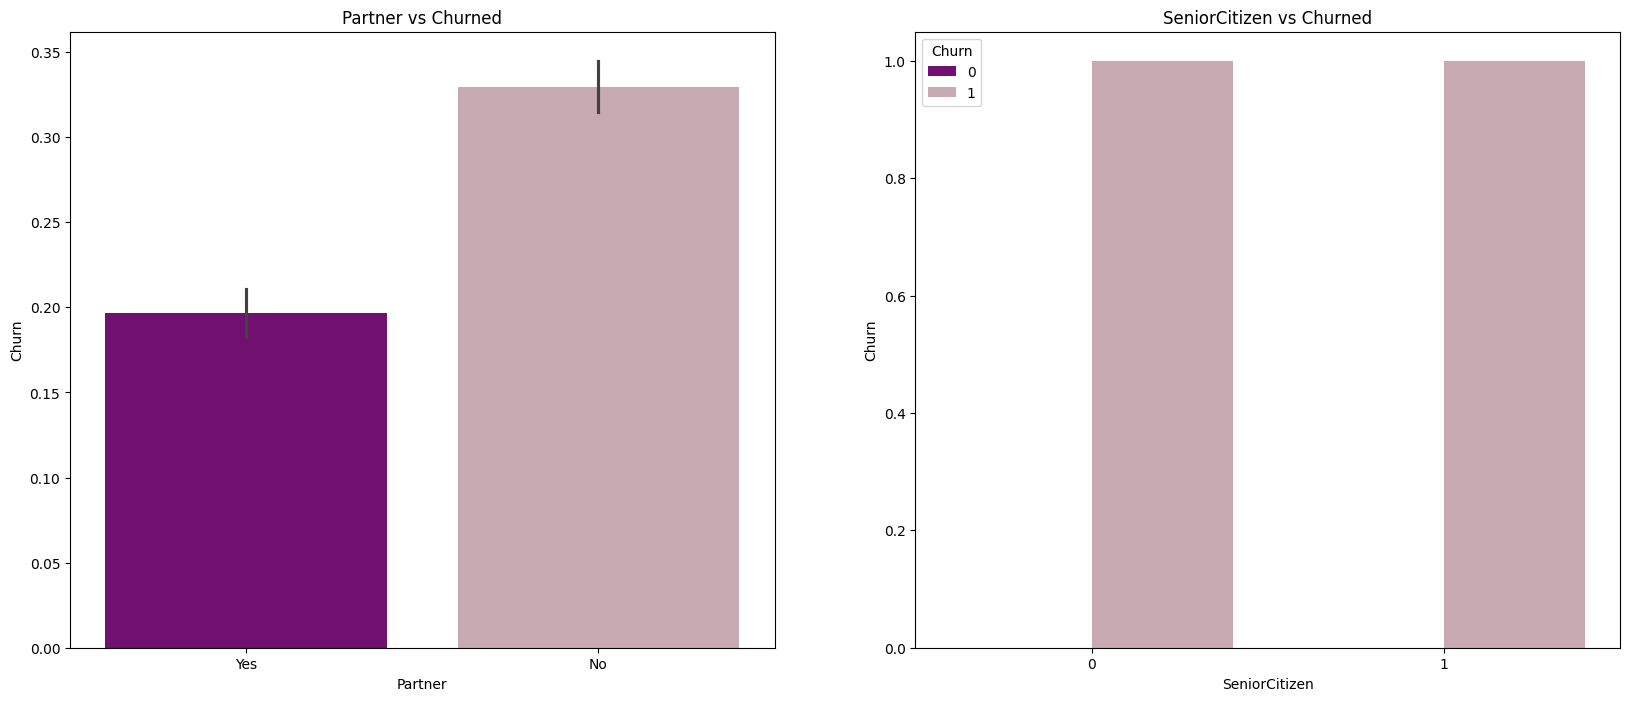

In [73]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='Partner', y='Churn', data=churn, palette=['purple', '#CDA5B0'], ax=ax[0])
ax[0].set_title('Partner vs Churned')
sns.barplot(x='SeniorCitizen', y='Churn', hue= 'Churn', data=churn, palette=['purple', '#CDA5B0'], ax=ax[1])
ax[1].set_title('SeniorCitizen vs Churned')
plt.close(2)
plt.show()

<h4>Key Observations:</h4>

<h5>Partner Status vs Churn (Left Graph):</h5>


<h5>Customers with Partners:</h5>
<ol>
Lower churn rate of approximately 20%.<br>
Shows more stability in customer retention.<br>
Error bars indicate reliable statistical difference.<br></ol>


<h5>Customers without Partners:</h5>
<ol>
Higher churn rate of approximately 33%.<br>
Shows significantly higher risk of churn.<br>
Clear difference of about 13 percentage points.<br></ol>

<h5>Senior Citizen Status vs Churn (Right Graph):</h5>


<h5>Non-Senior Citizens (0):</h5>
<ol>
Lower churn rate of approximately 24%.<br>
Better retention rate overall.<br>
Smaller error bars suggesting consistent pattern.<br></ol>


<h5>Senior Citizens (1):</h5>
<ol>
Much higher churn rate of approximately 42%.<br>
Shows significantly higher risk of leaving.<br>
Substantial difference of about 18 percentage points.<br></ol>



<h4>Key Insights:</h4>

<h5>Partner Impact:</h5>
<ol>
Having a partner appears to be a stabilizing factor.<br>
Partners may increase switching costs.<br>
Could indicate family-oriented service usage.<br></ol>

<h5>Age-Related Patterns:</h5>
<ol>
Senior citizens show notably higher churn risk.<br>
The difference is more pronounced than the partner effect.<br>
May indicate service alignment or accessibility issues for seniors.<br></ol>


<h4>Combined Demographics:
</h4>
<ol>
Both graphs show that certain demographic factors significantly influence churn.<br>
Social connections (partners) and age are important predictors of customer retention.<br>
The effects appear to be statistically significant based on error bars.<br></ol>

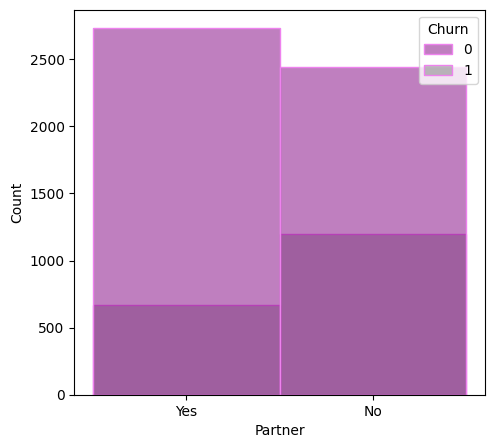

In [74]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 2)
_ = sns.histplot(x='Partner', hue='Churn', palette=['purple', 'grey'], edgecolor='violet', data=churn)


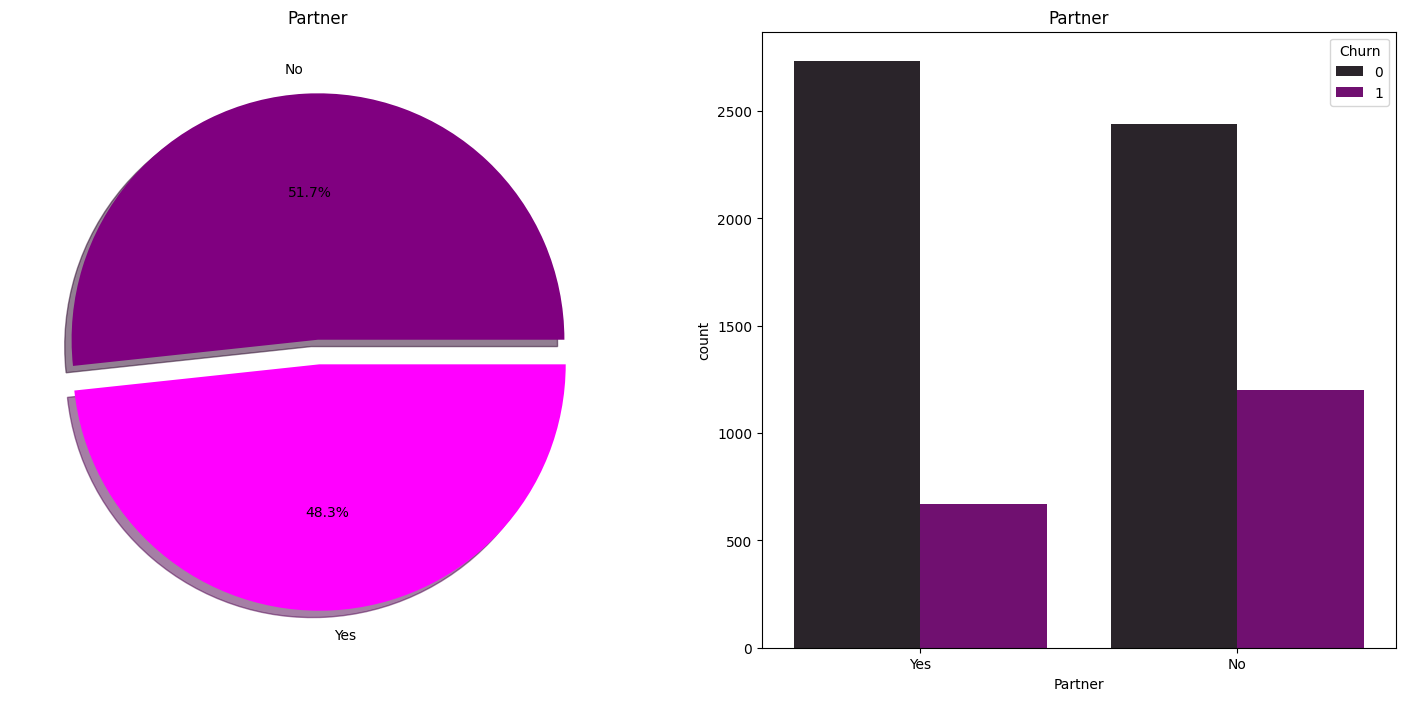

In [76]:

f,ax=plt.subplots(1,2,figsize=(18,8))
churn['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['purple', 'magenta'])
ax[0].set_title('Partner')
ax[0].set_ylabel('')
sns.countplot(churn,x='Partner',hue='Churn',palette='dark:purple')
ax[1].set_title('Partner')
plt.show()

Pie Chart - Partner:


48.3% of customers have a partner, while 51.7% do not have a partner.
This suggests that the customer base is fairly evenly split between those with and without a partner.
 
 The data suggests that the customer base is fairly evenly split between those with and without a partner, but having a partner appears to be associated with a lower churn rate. This could indicate that the presence of a partner provides additional stability, support, or incentive for customers to maintain their relationship with the service provider.

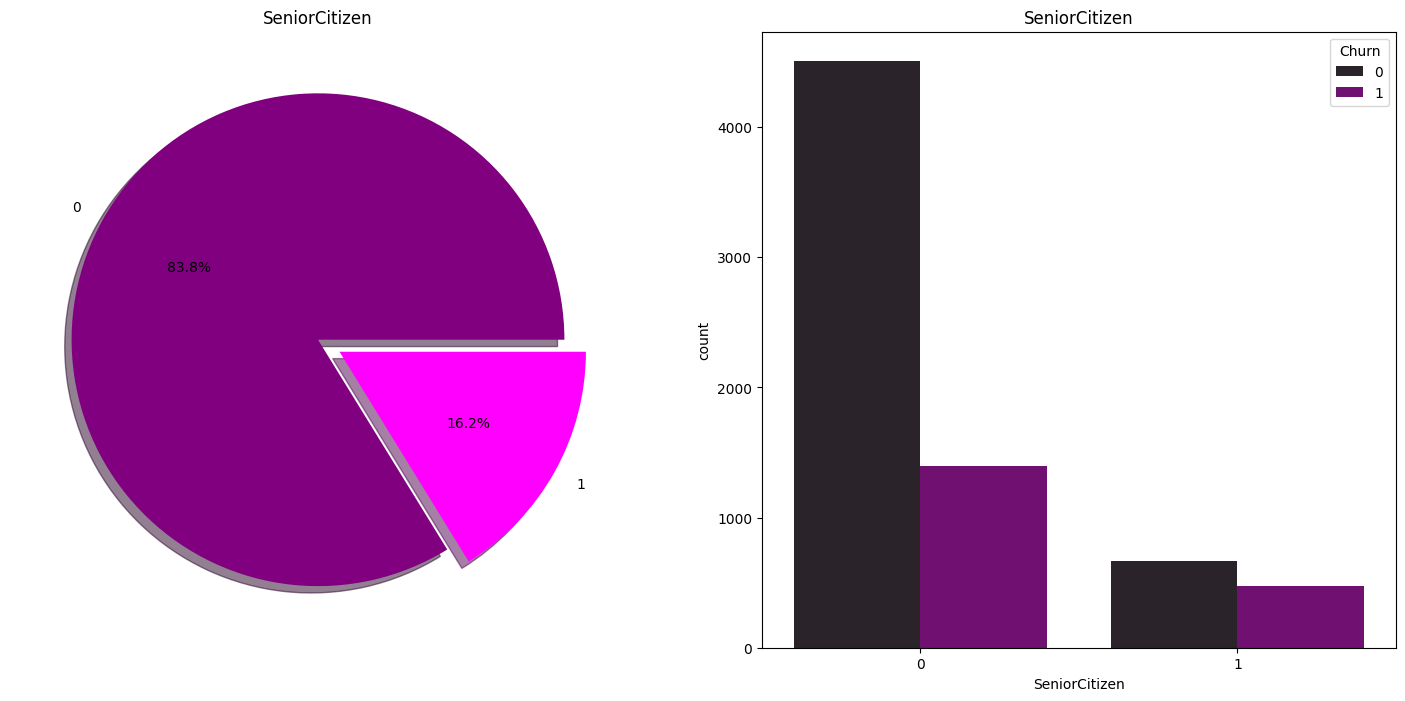

In [77]:

f,ax=plt.subplots(1,2,figsize=(18,8))
churn['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['purple', 'magenta'])
ax[0].set_title('SeniorCitizen')
ax[0].set_ylabel('')
sns.countplot(churn,x='SeniorCitizen',hue='Churn',palette='dark:purple')
ax[1].set_title('SeniorCitizen')
plt.show()

Analysis of Churn Based on Senior Citizen Status:

 Senior Citizen Distribution (Pie Chart) Observation:

The majority of customers (83.8%) are not senior citizens (0), while only 16.2% are senior citizens (1).
This indicates that the customer base is predominantly non-senior citizens.
    
 Churn by Senior Citizen Status (Bar Chart) Observation:
For non-senior citizens (0), there are far more customers who do not churn  compared to those who churn .
For senior citizens (1), the proportion of churners  is relatively higher compared to non-churners .

Resalts:

1. Senior Citizen Status
Insight: Senior citizens are more likely to churn than non-senior citizens.

2. Payment Methods
Insight:
Customers paying via Electronic Check have the highest churn rate.
Customers using automated payment methods (Bank Transfer, Credit Card) churn the least.

3. Monthly Charges
Insight: Customers with higher Monthly Charges are more likely to churn.

4. Total Charges (Customer Tenure)
Insight:
Customers with low Total Charges are more likely to churn. These are typically new customers with shorter tenures.

Insights Summary
Churning customers tend to be:

Senior citizens with challenges related to affordability or technology adaptation.
Users of manual payment methods like Electronic Checks, likely due to inconvenience or errors.
New customers with low Total Charges, indicating dissatisfaction or unmet expectations.
Customers with high Monthly Charges, possibly due to perceived lack of value for money.


<H2>Correlation</H2>

In [78]:
churn = pd.read_csv("churn.csv")

<h5>Data Cleaning.</h5>

Rename columns to lower letters

In [79]:
churn = churn.rename(columns=str.lower)
churn

customerid  gender  seniorcitizen partner dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     phoneservice     multiplelines internetservice onlinesecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     deviceprotection techsupport streamingtv streamingmovies        contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     paperlessbilling              paymentmethod monthlycharges  totalcharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [80]:
churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

**Categorical features count plot**

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\734876922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(data=churn, x=churn[variable], ax=ax, palette='rocket')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\734876922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(data=churn, x=churn[variable], ax=ax, palette='rocket')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\734876922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(data=churn, x=churn[variable], ax=ax, palette='rocket')
C:\User

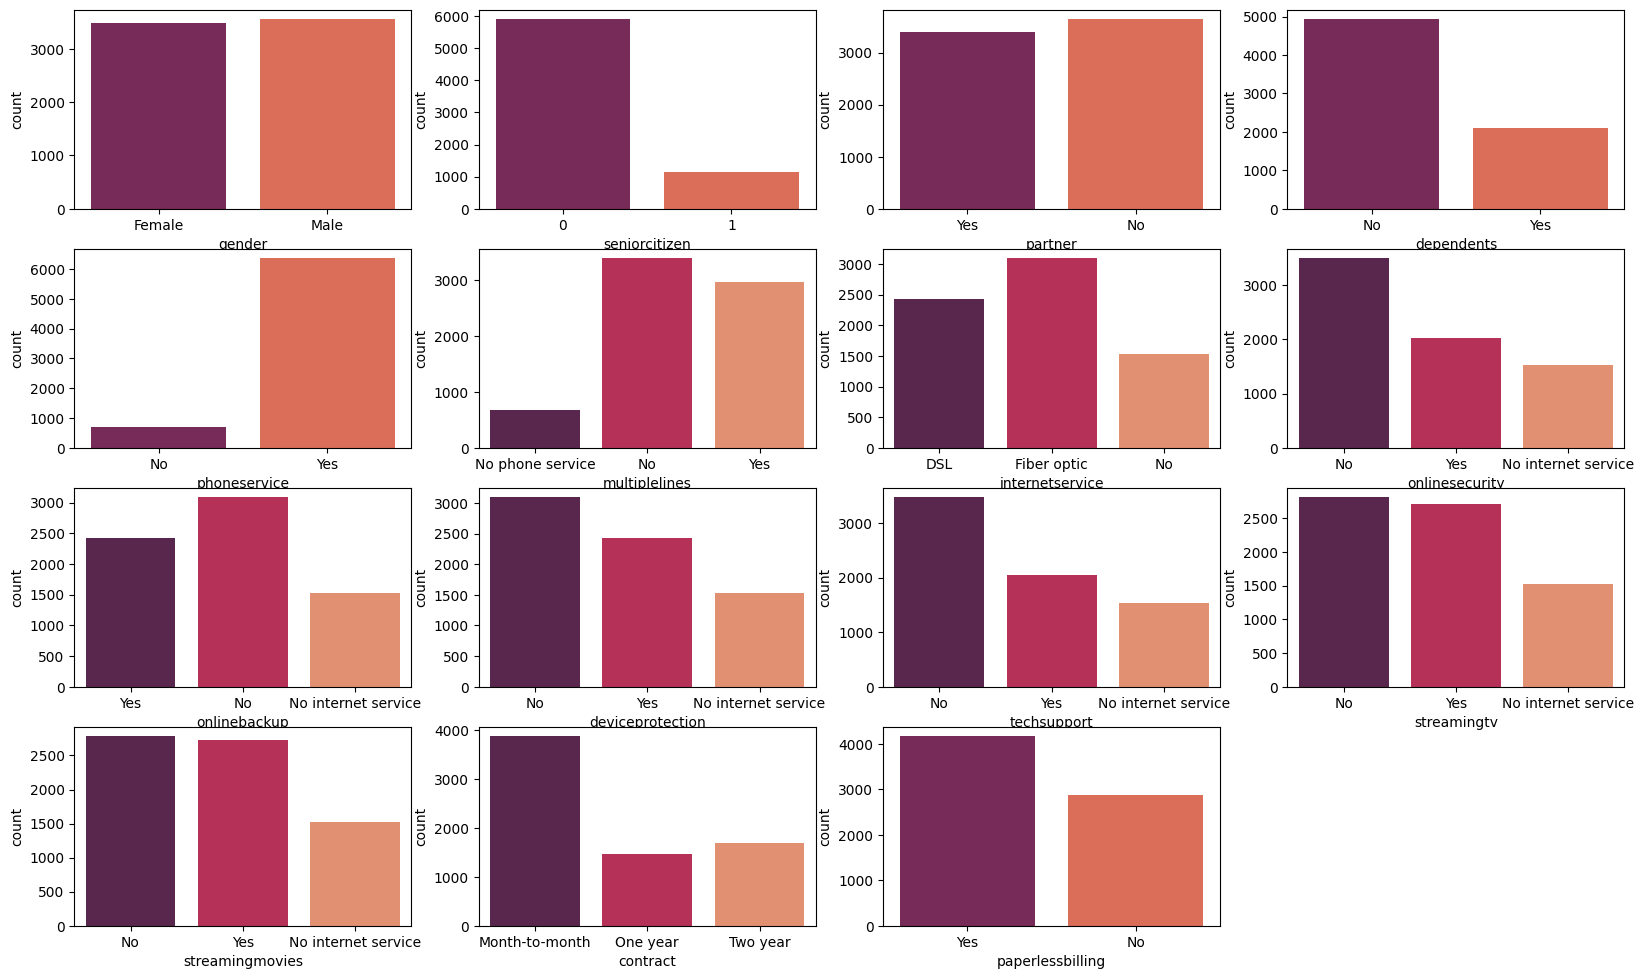

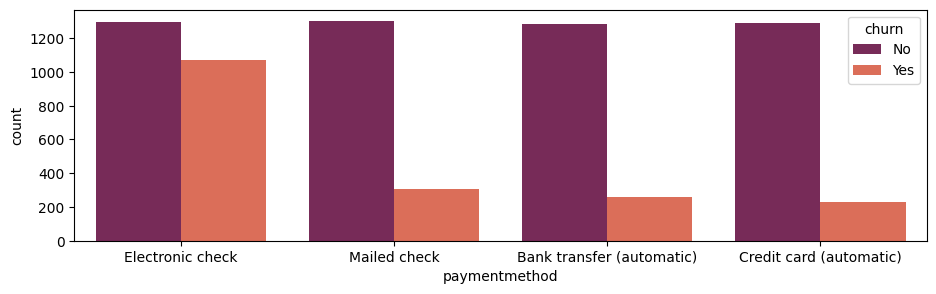

<Figure size 640x480 with 0 Axes>

In [81]:
cat_cols = ['gender','seniorcitizen','partner','dependents','phoneservice','multiplelines','internetservice',
              'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 
              'contract', 'paperlessbilling']

plt.figure(figsize=(20, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=churn, x=churn[variable], ax=ax, palette='rocket')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'paymentmethod', hue='churn', data=churn, palette='rocket')
plt.show() 
plt.tight_layout()

- The gender count plot shows an equally distribution of males and females in the dataset
- Some features have 'No' and 'No Internet Service' or 'No Phone Service' as a separate category which don't give new info and could all be considered as 'No' label

In [82]:
(churn.churn=='Yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

Label to numeric

In [83]:
churn.churn = (churn.churn=='Yes').astype('int')
churn.head(10)

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               paymentmethod monthlycharges  totalcharges churn  
0           Electronic check          29.85         29.85     0  
1               Mailed check          56.95        1889.5     0  
2               Mailed check          53.85        108.15     1  
3  Bank transfer (automatic)          42.30       1840.75     0  
4           Electronic check          70.70        151.65     1  
5           Electronic check          99.65         820.5     1  
6    Credit card (automatic)          89.10        1949.4     0  
7               Mailed check          29.75         301.9     0  
8           Electronic check         104.80       3046.05     1  
9  Bank transfer (automatic)          56.15       3487.95     0  

[10 rows x 21 columns]

**Replacing 'No internet service' and 'No phone service' with 'No'**

In [84]:
churn.replace(['No internet service','No phone service'], 'No', inplace=True)

Drop some features which aren't informative

In [85]:
cont_features = ['customerid', 'tenure', 'monthlycharges', 'totalcharges']
churn.drop(cont_features, axis=1, inplace=True)


In [86]:
churn.head(10)

gender  seniorcitizen partner dependents phoneservice multiplelines  \
0  Female              0     Yes         No           No            No   
1    Male              0      No         No          Yes            No   
2    Male              0      No         No          Yes            No   
3    Male              0      No         No           No            No   
4  Female              0      No         No          Yes            No   
5  Female              0      No         No          Yes           Yes   
6    Male              0      No        Yes          Yes           Yes   
7  Female              0      No         No           No            No   
8  Female              0     Yes         No          Yes           Yes   
9    Male              0      No        Yes          Yes            No   

  internetservice onlinesecurity onlinebackup deviceprotection techsupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   
5     Fiber optic             No           No              Yes          No   
6     Fiber optic             No          Yes               No          No   
7             DSL            Yes           No               No          No   
8     Fiber optic             No           No              Yes         Yes   
9             DSL            Yes          Yes               No          No   

  streamingtv streamingmovies        contract paperlessbilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   
5         Yes             Yes  Month-to-month              Yes   
6         Yes              No  Month-to-month              Yes   
7          No              No  Month-to-month               No   
8         Yes             Yes  Month-to-month              Yes   
9          No              No        One year               No   

               paymentmethod  churn  
0           Electronic check      0  
1               Mailed check      0  
2               Mailed check      1  
3  Bank transfer (automatic)      0  
4           Electronic check      1  
5           Electronic check      1  
6    Credit card (automatic)      0  
7               Mailed check      0  
8           Electronic check      1  
9  Bank transfer (automatic)      0

In [87]:
churn.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   seniorcitizen     7043 non-null   int64 
 2   partner           7043 non-null   object
 3   dependents        7043 non-null   object
 4   phoneservice      7043 non-null   object
 5   multiplelines     7043 non-null   object
 6   internetservice   7043 non-null   object
 7   onlinesecurity    7043 non-null   object
 8   onlinebackup      7043 non-null   object
 9   deviceprotection  7043 non-null   object
 10  techsupport       7043 non-null   object
 11  streamingtv       7043 non-null   object
 12  streamingmovies   7043 non-null   object
 13  contract          7043 non-null   object
 14  paperlessbilling  7043 non-null   object
 15  paymentmethod     7043 non-null   object
 16  churn             7043 non-null   int64 
dtypes: int64(2), o

In [88]:
churn.describe()

seniorcitizen        churn
count    7043.000000  7043.000000
mean        0.162147     0.265370
std         0.368612     0.441561
min         0.000000     0.000000
25%         0.000000     0.000000
50%         0.000000     0.000000
75%         0.000000     1.000000
max         1.000000     1.000000

In [89]:
churn.dtypes

gender              object
seniorcitizen        int64
partner             object
dependents          object
phoneservice        object
multiplelines       object
internetservice     object
onlinesecurity      object
onlinebackup        object
deviceprotection    object
techsupport         object
streamingtv         object
streamingmovies     object
contract            object
paperlessbilling    object
paymentmethod       object
churn                int64
dtype: object

In [90]:
churn.isna().mean()

gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
phoneservice        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
paperlessbilling    0.0
paymentmethod       0.0
churn               0.0
dtype: float64

In [311]:
churn.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
churn               0
dtype: int64

Categorical values to 1-hot

In [91]:

churn.onlinesecurity = (churn.onlinesecurity =='Yes').astype('int')
churn.onlinebackup = (churn.onlinebackup =='Yes').astype('int')
churn.deviceprotection = (churn.deviceprotection =='Yes').astype('int')
churn.techsupport = (churn.techsupport =='Yes').astype('int')
churn.streamingtv = (churn.streamingtv =='Yes').astype('int')
churn.streamingmovies = (churn.streamingmovies =='Yes').astype('int')
churn.multiplelines = (churn.multiplelines =='Yes').astype('int')
churn

gender  seniorcitizen partner dependents phoneservice  multiplelines  \
0     Female              0     Yes         No           No              0   
1       Male              0      No         No          Yes              0   
2       Male              0      No         No          Yes              0   
3       Male              0      No         No           No              0   
4     Female              0      No         No          Yes              0   
...      ...            ...     ...        ...          ...            ...   
7038    Male              0     Yes        Yes          Yes              1   
7039  Female              0     Yes        Yes          Yes              1   
7040  Female              0     Yes        Yes           No              0   
7041    Male              1     Yes         No          Yes              1   
7042    Male              0      No         No          Yes              0   

     internetservice  onlinesecurity  onlinebackup  deviceprotection  \
0                DSL               0             1                 0   
1                DSL               1             0                 1   
2                DSL               1             1                 0   
3                DSL               1             0                 1   
4        Fiber optic               0             0                 0   
...              ...             ...           ...               ...   
7038             DSL               1             0                 1   
7039     Fiber optic               0             1                 1   
7040             DSL               1             0                 0   
7041     Fiber optic               0             0                 0   
7042     Fiber optic               1             0                 1   

      techsupport  streamingtv  streamingmovies        contract  \
0               0            0                0  Month-to-month   
1               0            0                0        One year   
2               0            0                0  Month-to-month   
3               1            0                0        One year   
4               0            0                0  Month-to-month   
...           ...          ...              ...             ...   
7038            1            1                1        One year   
7039            0            1                1        One year   
7040            0            0                0  Month-to-month   
7041            0            0                0  Month-to-month   
7042            1            1                1        Two year   

     paperlessbilling              paymentmethod  churn  
0                 Yes           Electronic check      0  
1                  No               Mailed check      0  
2                 Yes               Mailed check      1  
3                  No  Bank transfer (automatic)      0  
4                 Yes           Electronic check      1  
...               ...                        ...    ...  
7038              Yes               Mailed check      0  
7039              Yes    Credit card (automatic)      0  
7040              Yes           Electronic check      0  
7041              Yes               Mailed check      1  
7042              Yes  Bank transfer (automatic)      0  

[7043 rows x 17 columns]

In [92]:
churn = pd.get_dummies(churn)


In [94]:
churn[['gender_Female','gender_Male']] = churn[['gender_Female','gender_Male']].astype(int)
churn

seniorcitizen  multiplelines  onlinesecurity  onlinebackup  \
0                 0              0               0             1   
1                 0              0               1             0   
2                 0              0               1             1   
3                 0              0               1             0   
4                 0              0               0             0   
...             ...            ...             ...           ...   
7038              0              1               1             0   
7039              0              1               0             1   
7040              0              0               1             0   
7041              1              1               0             0   
7042              0              0               1             0   

      deviceprotection  techsupport  streamingtv  streamingmovies  churn  \
0                    0            0            0                0      0   
1                    1            0            0                0      0   
2                    0            0            0                0      1   
3                    1            1            0                0      0   
4                    0            0            0                0      1   
...                ...          ...          ...              ...    ...   
7038                 1            1            1                1      0   
7039                 1            0            1                1      0   
7040                 0            0            0                0      0   
7041                 0            0            0                0      1   
7042                 1            1            1                1      0   

      gender_Female  ...  internetservice_No  contract_Month-to-month  \
0                 1  ...               False                     True   
1                 0  ...               False                    False   
2                 0  ...               False                     True   
3                 0  ...               False                    False   
4                 1  ...               False                     True   
...             ...  ...                 ...                      ...   
7038              0  ...               False                    False   
7039              1  ...               False                    False   
7040              1  ...               False                     True   
7041              0  ...               False                     True   
7042              0  ...               False                    False   

      contract_One year  contract_Two year  paperlessbilling_No  \
0                 False              False                False   
1                  True              False                 True   
2                 False              False                False   
3                  True              False                 True   
4                 False              False                False   
...                 ...                ...                  ...   
7038               True              False                False   
7039               True              False                False   
7040              False              False                False   
7041              False              False                False   
7042              False               True                False   

      paperlessbilling_Yes  paymentmethod_Bank transfer (automatic)  \
0                     True                                    False   
1                    False                                    False   
2                     True                                    False   
3                    False                                     True   
4                     True                                    False   
...                    ...                                      ...   
7038                  True                                    False   
7039                  True

In [95]:
churn.dtypes

seniorcitizen                              int64
multiplelines                              int64
onlinesecurity                             int64
onlinebackup                               int64
deviceprotection                           int64
techsupport                                int64
streamingtv                                int64
streamingmovies                            int64
churn                                      int64
gender_Female                              int64
gender_Male                                int64
partner_No                                  bool
partner_Yes                                 bool
dependents_No                               bool
dependents_Yes                              bool
phoneservice_No                             bool
phoneservice_Yes                            bool
internetservice_DSL                         bool
internetservice_Fiber optic                 bool
internetservice_No                          bool
contract_Month-to-mo

In [96]:
churn.isna().mean()

seniorcitizen                              0.0
multiplelines                              0.0
onlinesecurity                             0.0
onlinebackup                               0.0
deviceprotection                           0.0
techsupport                                0.0
streamingtv                                0.0
streamingmovies                            0.0
churn                                      0.0
gender_Female                              0.0
gender_Male                                0.0
partner_No                                 0.0
partner_Yes                                0.0
dependents_No                              0.0
dependents_Yes                             0.0
phoneservice_No                            0.0
phoneservice_Yes                           0.0
internetservice_DSL                        0.0
internetservice_Fiber optic                0.0
internetservice_No                         0.0
contract_Month-to-month                    0.0
contract_One 

Finding interesting relationships

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

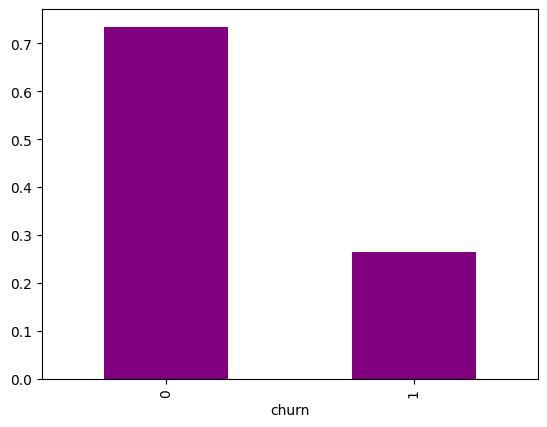

In [97]:
churn.churn.value_counts(normalize=True).plot(kind='bar',color='purple');
churn.churn.value_counts(normalize=True)

In [318]:
churn.corr()

seniorcitizen  multiplelines  \
seniorcitizen                                 1.000000       0.142948   
multiplelines                                 0.142948       1.000000   
onlinesecurity                               -0.038653       0.098108   
onlinebackup                                  0.066572       0.202237   
deviceprotection                              0.059428       0.201137   
techsupport                                  -0.060625       0.100571   
streamingtv                                   0.105378       0.257152   
streamingmovies                               0.120176       0.258751   
churn                                         0.150889       0.040102   
gender_Female                                 0.001874       0.008414   
gender_Male                                  -0.001874      -0.008414   
partner_No                                   -0.016479      -0.142057   
partner_Yes                                   0.016479       0.142057   
dependents_No                                 0.211185       0.024526   
dependents_Yes                               -0.211185      -0.024526   
phoneservice_No                              -0.008576      -0.279690   
phoneservice_Yes                              0.008576       0.279690   
internetservice_DSL                          -0.108322      -0.199920   
internetservice_Fiber optic                   0.255338       0.366083   
internetservice_No                           -0.182742      -0.210564   
contract_Month-to-month                       0.138360      -0.088203   
contract_One year                            -0.046262      -0.003794   
contract_Two year                            -0.117000       0.106253   
paperlessbilling_No                          -0.156530      -0.163530   
paperlessbilling_Yes                          0.156530       0.163530   
paymentmethod_Bank transfer (automatic)      -0.016159       0.075527   
paymentmethod_Credit card (automatic)        -0.024135       0.060048   
paymentmethod_Electronic check                0.171718       0.083618   
paymentmethod_Mailed check                   -0.153477      -0.227206   

                                         onlinesecurity  onlinebackup  \
seniorcitizen                                 -0.038653      0.066572   
multiplelines                                  0.098108      0.202237   
onlinesecurity                                 1.000000      0.283832   
onlinebackup                                   0.283832      1.000000   
deviceprotection                               0.275438      0.303546   
techsupport                                    0.354931      0.294233   
streamingtv                                    0.176207      0.282106   
streamingmovies                                0.187398      0.274501   
churn                                         -0.171226     -0.082255   
gender_Female                                  0.017021      0.013773   
gender_Male                                   -0.017021     -0.013773   
partner_No                                    -0.143106     -0.141498   
partner_Yes                                    0.143106      0.141498   
dependents_No                                 -0.080972     -0.023671   
dependents_Yes                                 0.080972      0.023671   
phoneservice_No                                0.092893      0.052312   
phoneservice_Yes                              -0.092893     -0.052312   
internetservice_DSL                            0.321269      0.157884   
internetservice_Fiber optic                   -0.030696      0.165651   
internetservice_No                            -0.333403     -0.381593   
contract_Month-to-month                       -0.246679     -0.164172   
contract_One year                              0.100162      0.083722   
contract_Two year                              0.191773      0.111400   
paperlessbilling_No                            0.003636     -0.126735   
paperlessbilling_Yes     

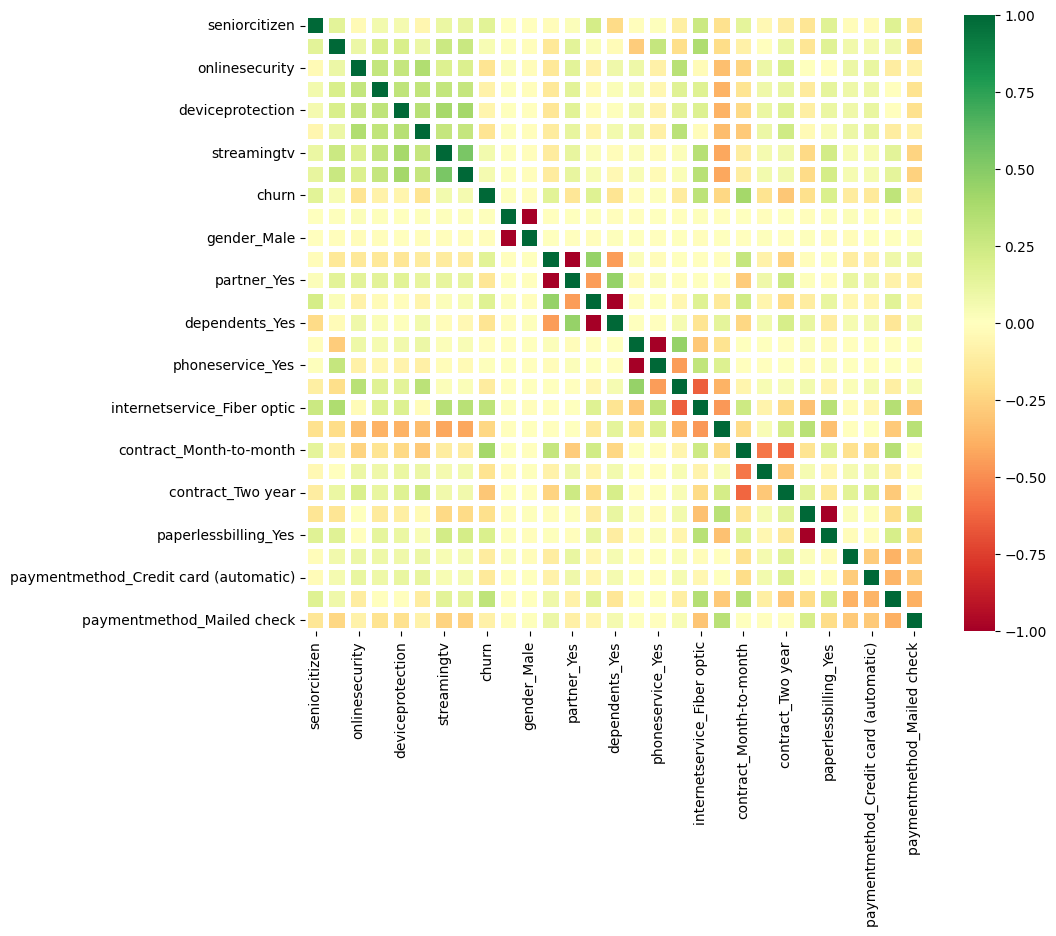

In [98]:
sns.heatmap(churn.corr(),annot=False,cmap='RdYlGn',linewidths=3) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Let's see what correlations are in the data

<Axes: >

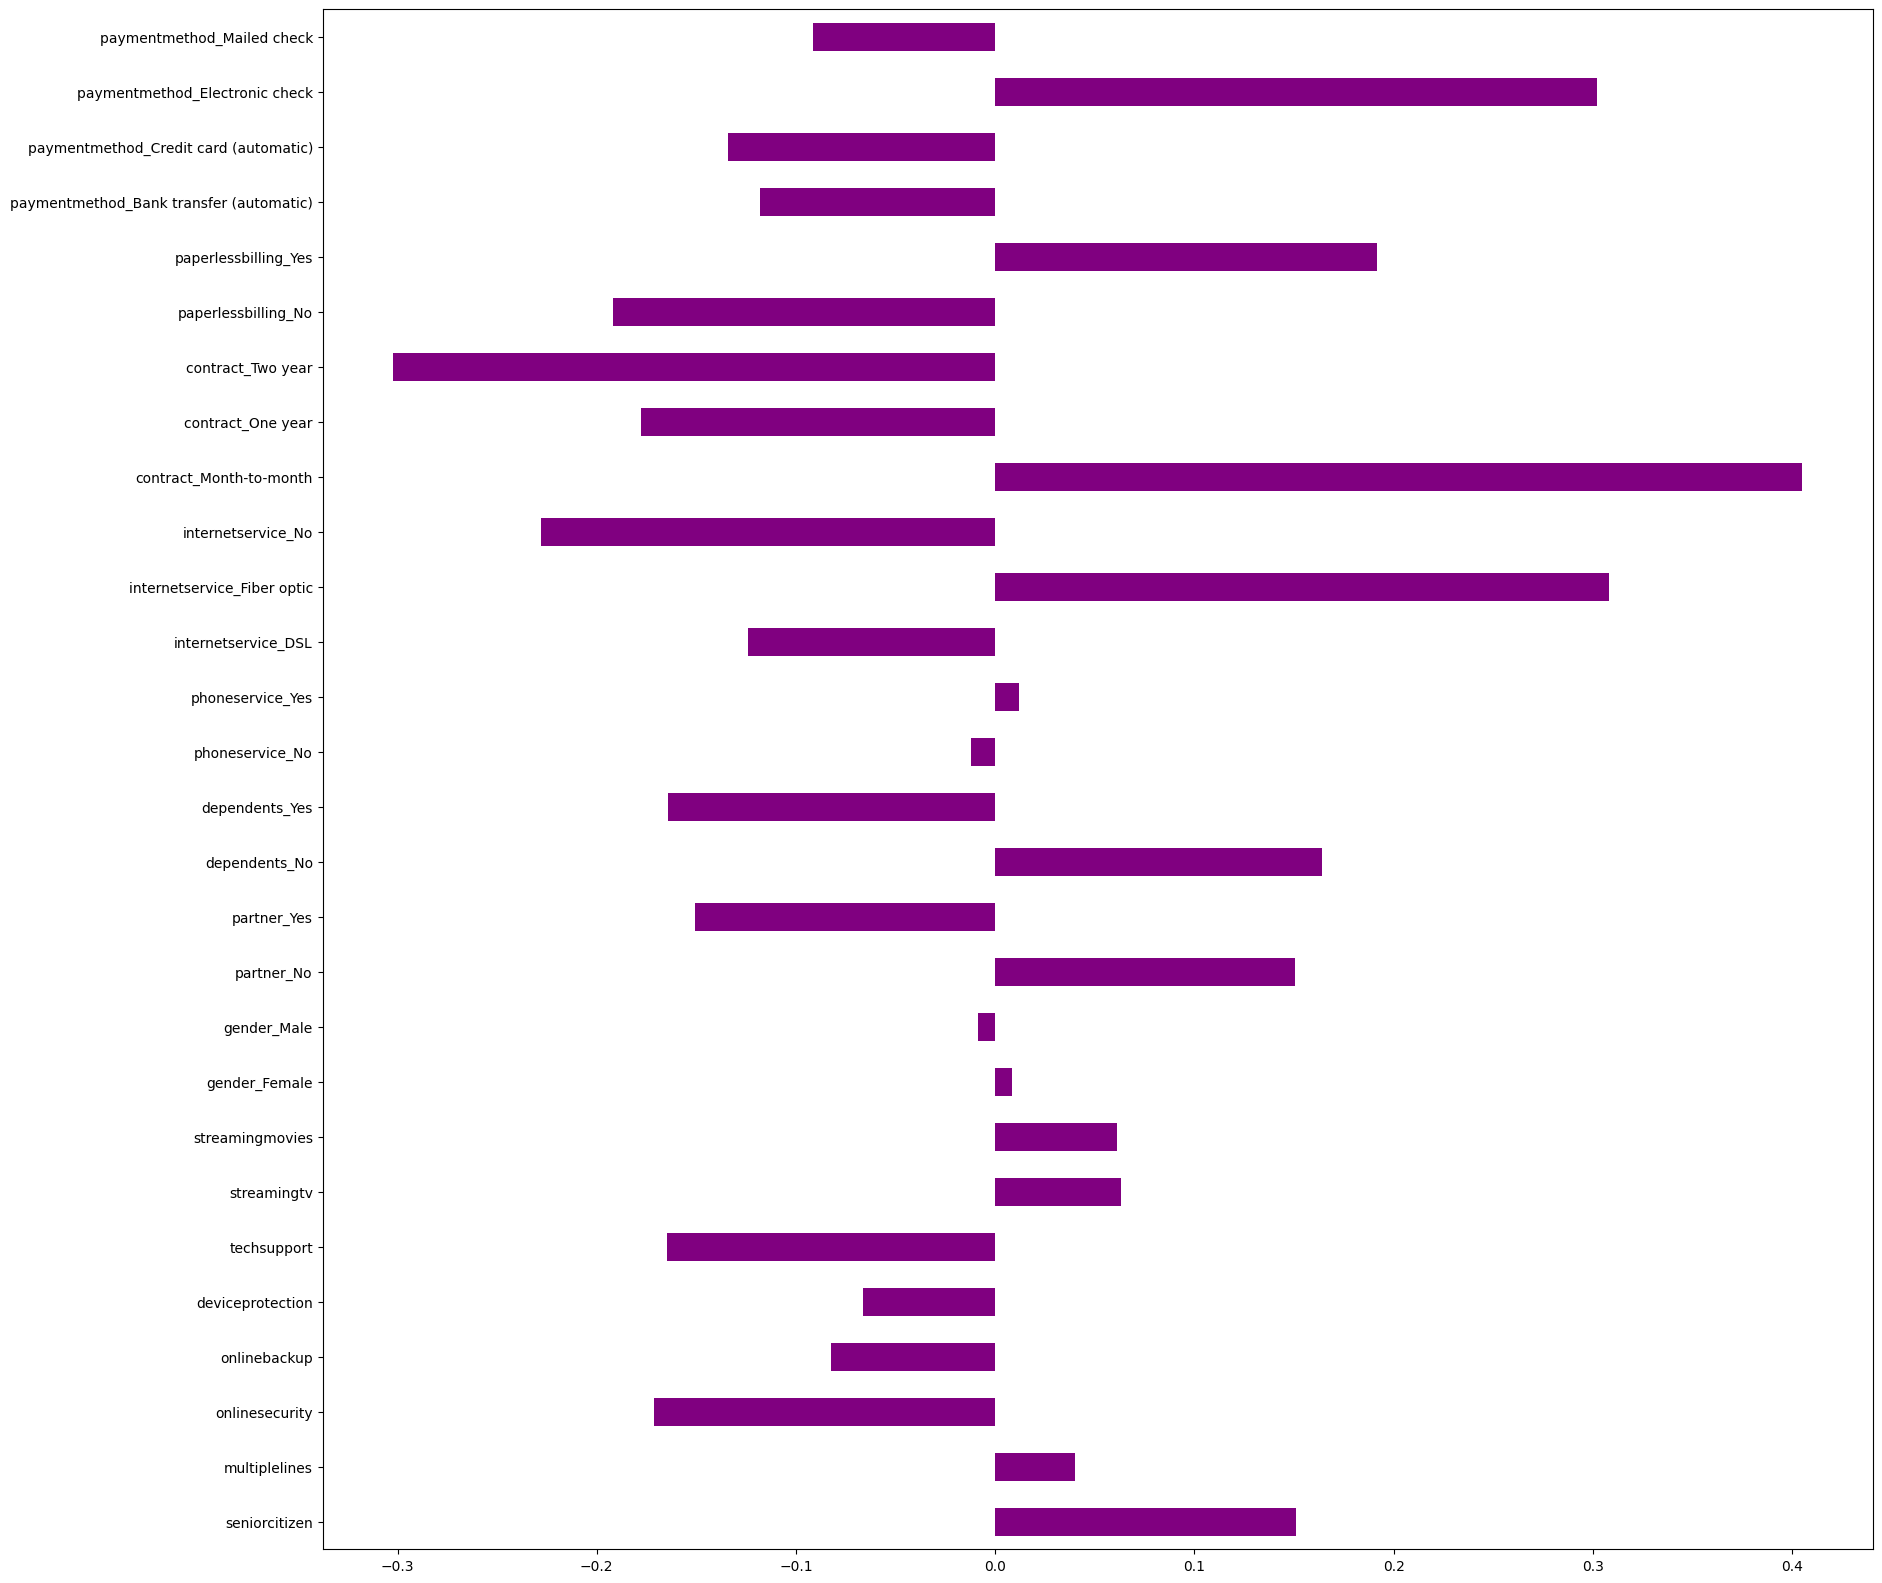

In [100]:
churn.corr()['churn'].drop('churn').plot(kind='barh',figsize=(20, 20),color='purple')

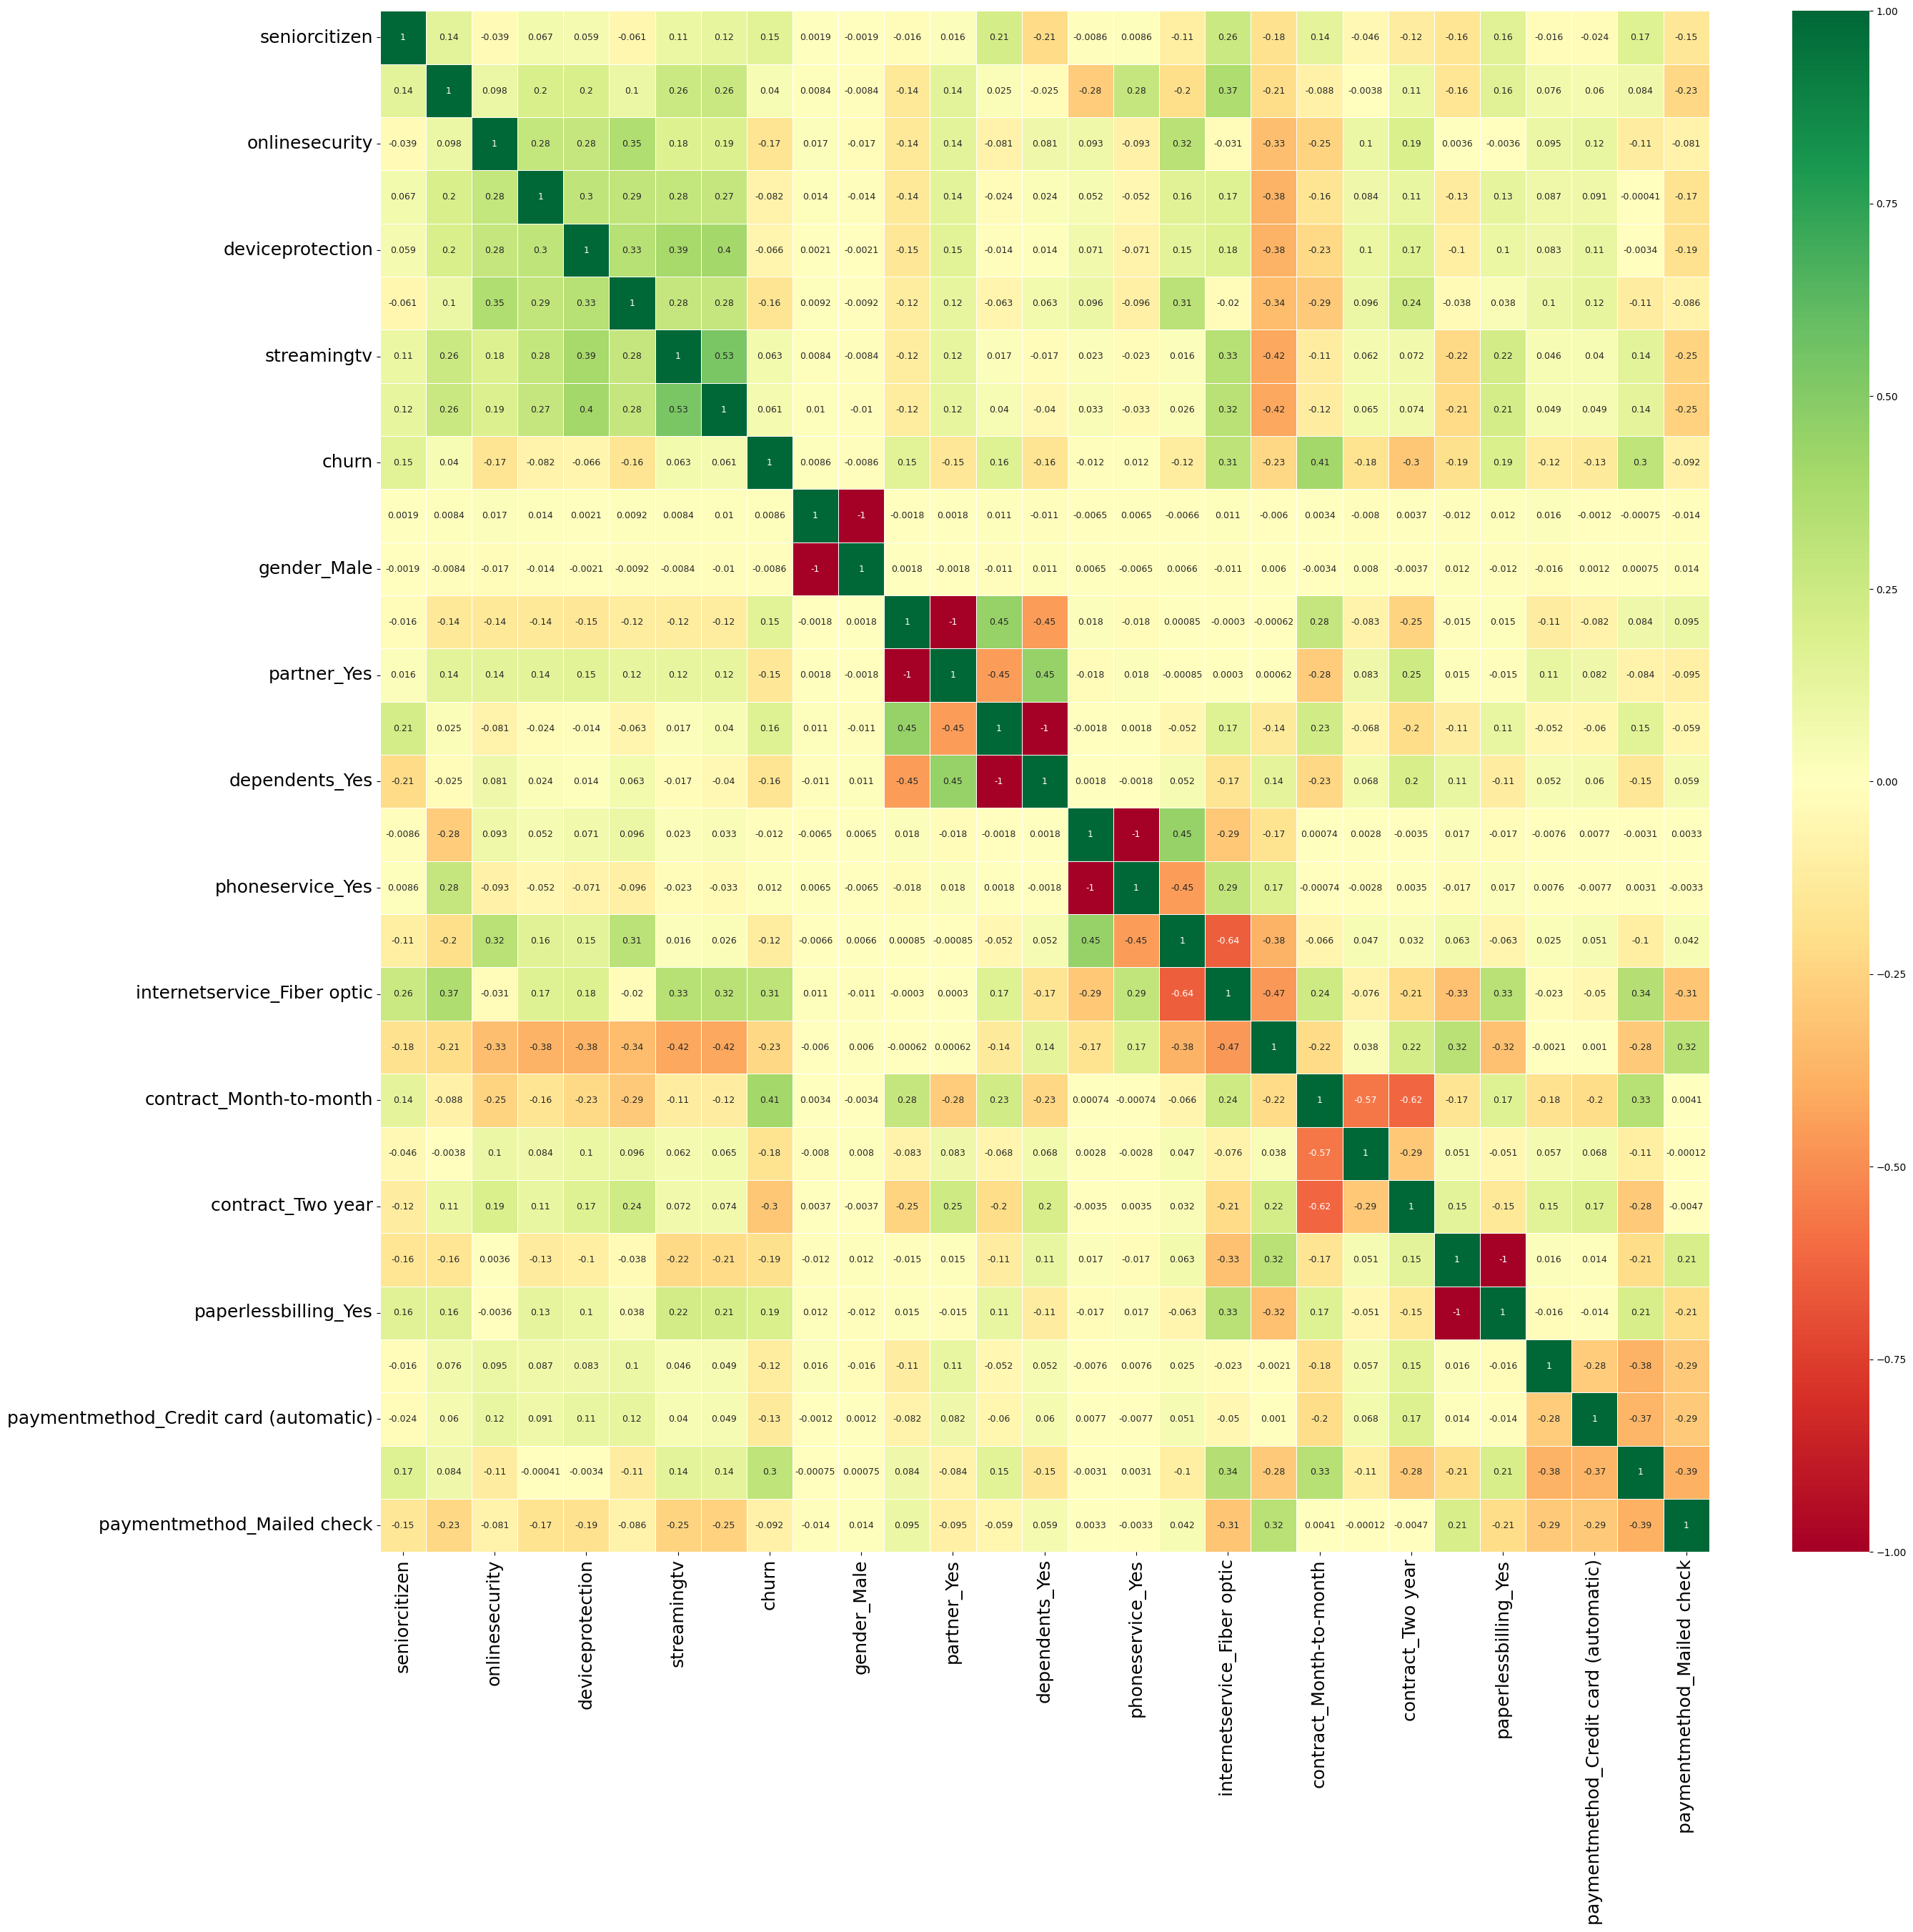

In [101]:

sns.heatmap(churn.corr(),cmap='RdYlGn',linewidths=0.5,annot=True,annot_kws={"fontsize":9})
fig=plt.gcf()
fig.set_size_inches(30,28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<H4>Predictive Modeling</H4>

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a customers will churn or not. So now we will predict the whether the customers will churn or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:<ol>

1)Decision Tree

2)Random Forest 

3)KNN - K Nearest Neighbors

4)Evaluation + Benchmark

5)Gaussian Naive Bayes

6)Radial Support Vector Machines(rbf-SVM)

7)Logistic Regression</ol>

In [102]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm ,  metrics
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,  accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [103]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
churn = pd.read_csv("churn.csv")

****Data Prep****

In [105]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn['TotalCharges'] = churn['TotalCharges'].fillna(0)

In [106]:
churn = churn.rename(columns=str.lower) # Rename columns to lower letters
churn.churn = (churn.churn=='Yes').astype('int') # Label to numeric
churn = churn.drop(['customerid',], axis=1)
churn = pd.get_dummies(churn) # Categorical values to 1-hot ("one hot" encoding is a representation of categorical variables as binary vectors)
churn = churn.astype(float) # Let's convert all data to float because some modules warn against other types
churn

seniorcitizen  tenure  monthlycharges  totalcharges  churn  \
0               0.0     1.0           29.85         29.85    0.0   
1               0.0    34.0           56.95       1889.50    0.0   
2               0.0     2.0           53.85        108.15    1.0   
3               0.0    45.0           42.30       1840.75    0.0   
4               0.0     2.0           70.70        151.65    1.0   
...             ...     ...             ...           ...    ...   
7038            0.0    24.0           84.80       1990.50    0.0   
7039            0.0    72.0          103.20       7362.90    0.0   
7040            0.0    11.0           29.60        346.45    0.0   
7041            1.0     4.0           74.40        306.60    1.0   
7042            0.0    66.0          105.65       6844.50    0.0   

      gender_Female  gender_Male  partner_No  partner_Yes  dependents_No  ...  \
0               1.0          0.0         0.0          1.0            1.0  ...   
1               0.0          1.0         1.0          0.0            1.0  ...   
2               0.0          1.0         1.0          0.0            1.0  ...   
3               0.0          1.0         1.0          0.0            1.0  ...   
4               1.0          0.0         1.0          0.0            1.0  ...   
...             ...          ...         ...          ...            ...  ...   
7038            0.0          1.0         0.0          1.0            0.0  ...   
7039            1.0          0.0         0.0          1.0            0.0  ...   
7040            1.0          0.0         0.0          1.0            0.0  ...   
7041            0.0          1.0         0.0          1.0            1.0  ...   
7042            0.0          1.0         1.0          0.0            1.0  ...   

      streamingmovies_Yes  contract_Month-to-month  contract_One year  \
0                     0.0                      1.0                0.0   
1                     0.0                      0.0                1.0   
2                     0.0                      1.0                0.0   
3                     0.0                      0.0                1.0   
4                     0.0                      1.0                0.0   
...                   ...                      ...                ...   
7038                  1.0                      0.0                1.0   
7039                  1.0                      0.0                1.0   
7040                  0.0                      1.0                0.0   
7041                  0.0                      1.0                0.0   
7042                  1.0                      0.0                0.0   

      contract_Two year  paperlessbilling_No  paperlessbilling_Yes  \
0                   0.0                  0.0                   1.0   
1                   0.0                  1.0                   0.0   
2                   0.0                  0.0                   1.0   
3                   0.0                  1.0                   0.0   
4                   0.0                  0.0                   1.0   
...                 ...                  ...                   ...   
7038                0.0                  0.0                   1.0   
7039                0.0                  0.0                   1.0   
7040                0.0                  0.0                   1.0   
7041                0.0                  0.0                   1.0   
7042                1.0                  0.0                   1.0   

      paymentmethod_Bank transfer (automatic)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
7038                                      0.0   
7039                                      0.0   
7040                                      0.0   
7041    

In [107]:
churn.dtypes

seniorcitizen                              float64
tenure                                     float64
monthlycharges                             float64
totalcharges                               float64
churn                                      float64
gender_Female                              float64
gender_Male                                float64
partner_No                                 float64
partner_Yes                                float64
dependents_No                              float64
dependents_Yes                             float64
phoneservice_No                            float64
phoneservice_Yes                           float64
multiplelines_No                           float64
multiplelines_No phone service             float64
multiplelines_Yes                          float64
internetservice_DSL                        float64
internetservice_Fiber optic                float64
internetservice_No                         float64
onlinesecurity_No              

<H4>Supervised Learning</H4>

<H5>Train and Test split</H5>

In [108]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(churn, test_size=0.2, random_state=0, shuffle=True)

In [109]:
# train
# ------------------------------------------------
x_train = train.drop('churn', axis=1)
y_train = train['churn']

# test
# ------------------------------------------------
x_test = test.drop('churn', axis=1)
y_test = test['churn']

In [110]:
#Confirm the splitting is correct:
print("Shape of Training Data : ", "\nfeatures:", x_train.shape, ", target:", y_train.shape)
print("Target Label Distribution in train set : ", "\nChurn:", y_train.sum(), "Not Churn", len(y_train) - y_train.sum())
print("Percentage of Churn:", y_train.sum() / len(y_train) * 100)
print()
print("Shape of Test Data : ", "\nfeatures:", x_test.shape, ", target:", y_test.shape)
print("Target Label Distribution in test set : ", "\nChurn:", y_test.sum(), "Not Churn", len(y_test) - y_test.sum())
print("Percentage of Churn:", y_test.sum() / len(y_test) * 100)

Shape of Training Data :  
features: (5634, 45) , target: (5634,)
Target Label Distribution in train set :  
Churn: 1501.0 Not Churn 4133.0
Percentage of Churn: 26.641817536386224

Shape of Test Data :  
features: (1409, 45) , target: (1409,)
Target Label Distribution in test set :  
Churn: 368.0 Not Churn 1041.0
Percentage of Churn: 26.117814052519517


In [111]:
print("Training set size:", x_train.shape[0])
print("Training labels size:", y_train.shape[0])
print("Test set size:", x_test.shape[0])
print("Test labels size:", y_test.shape[0])

Training set size: 5634
Training labels size: 5634
Test set size: 1409
Test labels size: 1409


In [112]:
print("Number of features in training set:", x_train.shape[1])
print("Number of features in test set:", x_test.shape[1])

Number of features in training set: 45
Number of features in test set: 45


In [113]:
print("Feature names:", x_train.columns)

Feature names: Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_Female', 'gender_Male', 'partner_No', 'partner_Yes',
       'dependents_No', 'dependents_Yes', 'phoneservice_No',
       'phoneservice_Yes', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No', 'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contra

In [114]:
train

seniorcitizen  tenure  monthlycharges  totalcharges  churn  \
2920            0.0    72.0           85.10       6155.40    0.0   
2966            1.0    14.0           46.35        672.70    0.0   
6099            0.0    71.0           24.70       1810.55    0.0   
5482            0.0    33.0           73.90       2405.05    1.0   
2012            0.0    47.0           98.75       4533.70    1.0   
...             ...     ...             ...           ...    ...   
4931            0.0    15.0          103.45       1539.80    0.0   
3264            0.0    10.0           91.10        964.35    0.0   
1653            0.0    58.0           20.75       1185.95    0.0   
2607            1.0     1.0           69.75         69.75    1.0   
2732            0.0     4.0           20.40         94.50    0.0   

      gender_Female  gender_Male  partner_No  partner_Yes  dependents_No  ...  \
2920            1.0          0.0         0.0          1.0            1.0  ...   
2966            1.0          0.0         1.0          0.0            1.0  ...   
6099            1.0          0.0         0.0          1.0            0.0  ...   
5482            0.0          1.0         0.0          1.0            0.0  ...   
2012            1.0          0.0         0.0          1.0            1.0  ...   
...             ...          ...         ...          ...            ...  ...   
4931            0.0          1.0         0.0          1.0            1.0  ...   
3264            1.0          0.0         1.0          0.0            0.0  ...   
1653            0.0          1.0         0.0          1.0            1.0  ...   
2607            0.0          1.0         1.0          0.0            1.0  ...   
2732            1.0          0.0         1.0          0.0            0.0  ...   

      streamingmovies_Yes  contract_Month-to-month  contract_One year  \
2920                  1.0                      0.0                0.0   
2966                  1.0                      1.0                0.0   
6099                  0.0                      0.0                0.0   
5482                  1.0                      0.0                1.0   
2012                  0.0                      1.0                0.0   
...                   ...                      ...                ...   
4931                  1.0                      1.0                0.0   
3264                  0.0                      1.0                0.0   
1653                  0.0                      0.0                0.0   
2607                  0.0                      1.0                0.0   
2732                  0.0                      1.0                0.0   

      contract_Two year  paperlessbilling_No  paperlessbilling_Yes  \
2920                1.0                  1.0                   0.0   
2966                0.0                  0.0                   1.0   
6099                1.0                  1.0                   0.0   
5482                0.0                  0.0                   1.0   
2012                0.0                  0.0                   1.0   
...                 ...                  ...                   ...   
4931                0.0                  0.0                   1.0   
3264                0.0                  0.0                   1.0   
1653                1.0                  1.0                   0.0   
2607                0.0                  0.0                   1.0   
2732                0.0                  1.0                   0.0   

      paymentmethod_Bank transfer (automatic)  \
2920                                      0.0   
2966                                      0.0   
6099                                      1.0   
5482                                      0.0   
2012                                      0.0   
...                                       ...   
4931                                      0.0   
3264                                      0.0   
1653                                      0.0   
2607    

In [115]:
test

seniorcitizen  tenure  monthlycharges  totalcharges  churn  \
2200            0.0    19.0           58.20       1045.25    0.0   
4627            0.0    60.0          116.60       7049.50    0.0   
3225            0.0    13.0           71.95        923.85    0.0   
2828            0.0     1.0           20.45         20.45    0.0   
3768            0.0    55.0           77.75       4266.40    0.0   
...             ...     ...             ...           ...    ...   
2631            1.0     7.0           99.25        665.45    1.0   
5333            0.0    13.0           88.35       1222.80    1.0   
6972            1.0    56.0          111.95       6418.90    1.0   
4598            0.0    18.0           56.25        969.85    0.0   
3065            0.0     1.0           45.80         45.80    0.0   

      gender_Female  gender_Male  partner_No  partner_Yes  dependents_No  ...  \
2200            1.0          0.0         1.0          0.0            1.0  ...   
4627            0.0          1.0         1.0          0.0            1.0  ...   
3225            1.0          0.0         1.0          0.0            1.0  ...   
2828            0.0          1.0         1.0          0.0            1.0  ...   
3768            1.0          0.0         0.0          1.0            1.0  ...   
...             ...          ...         ...          ...            ...  ...   
2631            0.0          1.0         0.0          1.0            1.0  ...   
5333            1.0          0.0         0.0          1.0            0.0  ...   
6972            1.0          0.0         1.0          0.0            1.0  ...   
4598            0.0          1.0         1.0          0.0            1.0  ...   
3065            0.0          1.0         1.0          0.0            1.0  ...   

      streamingmovies_Yes  contract_Month-to-month  contract_One year  \
2200                  0.0                      0.0                1.0   
4627                  1.0                      0.0                1.0   
3225                  1.0                      1.0                0.0   
2828                  0.0                      0.0                0.0   
3768                  0.0                      1.0                0.0   
...                   ...                      ...                ...   
2631                  1.0                      1.0                0.0   
5333                  1.0                      1.0                0.0   
6972                  1.0                      0.0                1.0   
4598                  0.0                      1.0                0.0   
3065                  0.0                      1.0                0.0   

      contract_Two year  paperlessbilling_No  paperlessbilling_Yes  \
2200                0.0                  1.0                   0.0   
4627                0.0                  0.0                   1.0   
3225                0.0                  0.0                   1.0   
2828                1.0                  1.0                   0.0   
3768                0.0                  0.0                   1.0   
...                 ...                  ...                   ...   
2631                0.0                  0.0                   1.0   
5333                0.0                  1.0                   0.0   
6972                0.0                  0.0                   1.0   
4598                0.0                  1.0                   0.0   
3065                0.0                  0.0                   1.0   

      paymentmethod_Bank transfer (automatic)  \
2200                                      0.0   
4627                                      0.0   
3225                                      0.0   
2828                                      0.0   
3768                                      0.0   
...                                       ...   
2631                                      0.0   
5333                                      0.0   
6972                                      0.0   
4598    

In [116]:
x_train

seniorcitizen  tenure  monthlycharges  totalcharges  gender_Female  \
2920            0.0    72.0           85.10       6155.40            1.0   
2966            1.0    14.0           46.35        672.70            1.0   
6099            0.0    71.0           24.70       1810.55            1.0   
5482            0.0    33.0           73.90       2405.05            0.0   
2012            0.0    47.0           98.75       4533.70            1.0   
...             ...     ...             ...           ...            ...   
4931            0.0    15.0          103.45       1539.80            0.0   
3264            0.0    10.0           91.10        964.35            1.0   
1653            0.0    58.0           20.75       1185.95            0.0   
2607            1.0     1.0           69.75         69.75            0.0   
2732            0.0     4.0           20.40         94.50            1.0   

      gender_Male  partner_No  partner_Yes  dependents_No  dependents_Yes  \
2920          0.0         0.0          1.0            1.0             0.0   
2966          0.0         1.0          0.0            1.0             0.0   
6099          0.0         0.0          1.0            0.0             1.0   
5482          1.0         0.0          1.0            0.0             1.0   
2012          0.0         0.0          1.0            1.0             0.0   
...           ...         ...          ...            ...             ...   
4931          1.0         0.0          1.0            1.0             0.0   
3264          0.0         1.0          0.0            0.0             1.0   
1653          1.0         0.0          1.0            1.0             0.0   
2607          1.0         1.0          0.0            1.0             0.0   
2732          0.0         1.0          0.0            0.0             1.0   

      ...  streamingmovies_Yes  contract_Month-to-month  contract_One year  \
2920  ...                  1.0                      0.0                0.0   
2966  ...                  1.0                      1.0                0.0   
6099  ...                  0.0                      0.0                0.0   
5482  ...                  1.0                      0.0                1.0   
2012  ...                  0.0                      1.0                0.0   
...   ...                  ...                      ...                ...   
4931  ...                  1.0                      1.0                0.0   
3264  ...                  0.0                      1.0                0.0   
1653  ...                  0.0                      0.0                0.0   
2607  ...                  0.0                      1.0                0.0   
2732  ...                  0.0                      1.0                0.0   

      contract_Two year  paperlessbilling_No  paperlessbilling_Yes  \
2920                1.0                  1.0                   0.0   
2966                0.0                  0.0                   1.0   
6099                1.0                  1.0                   0.0   
5482                0.0                  0.0                   1.0   
2012                0.0                  0.0                   1.0   
...                 ...                  ...                   ...   
4931                0.0                  0.0                   1.0   
3264                0.0                  0.0                   1.0   
1653                1.0                  1.0                   0.0   
2607                0.0                  0.0                   1.0   
2732                0.0                  1.0                   0.0   

      paymentmethod_Bank transfer (automatic)  \
2920                                      0.0   
2966                                      0.0   
6099                                      1.0   
5482                                      0.0   
2012                                      0.0   
...                                       ...   
4931                                      0.0  

In [117]:
y_train

2920    0.0
2966    0.0
6099    0.0
5482    1.0
2012    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: churn, Length: 5634, dtype: float64

In [118]:
x_test

seniorcitizen  tenure  monthlycharges  totalcharges  gender_Female  \
2200            0.0    19.0           58.20       1045.25            1.0   
4627            0.0    60.0          116.60       7049.50            0.0   
3225            0.0    13.0           71.95        923.85            1.0   
2828            0.0     1.0           20.45         20.45            0.0   
3768            0.0    55.0           77.75       4266.40            1.0   
...             ...     ...             ...           ...            ...   
2631            1.0     7.0           99.25        665.45            0.0   
5333            0.0    13.0           88.35       1222.80            1.0   
6972            1.0    56.0          111.95       6418.90            1.0   
4598            0.0    18.0           56.25        969.85            0.0   
3065            0.0     1.0           45.80         45.80            0.0   

      gender_Male  partner_No  partner_Yes  dependents_No  dependents_Yes  \
2200          0.0         1.0          0.0            1.0             0.0   
4627          1.0         1.0          0.0            1.0             0.0   
3225          0.0         1.0          0.0            1.0             0.0   
2828          1.0         1.0          0.0            1.0             0.0   
3768          0.0         0.0          1.0            1.0             0.0   
...           ...         ...          ...            ...             ...   
2631          1.0         0.0          1.0            1.0             0.0   
5333          0.0         0.0          1.0            0.0             1.0   
6972          0.0         1.0          0.0            1.0             0.0   
4598          1.0         1.0          0.0            1.0             0.0   
3065          1.0         1.0          0.0            1.0             0.0   

      ...  streamingmovies_Yes  contract_Month-to-month  contract_One year  \
2200  ...                  0.0                      0.0                1.0   
4627  ...                  1.0                      0.0                1.0   
3225  ...                  1.0                      1.0                0.0   
2828  ...                  0.0                      0.0                0.0   
3768  ...                  0.0                      1.0                0.0   
...   ...                  ...                      ...                ...   
2631  ...                  1.0                      1.0                0.0   
5333  ...                  1.0                      1.0                0.0   
6972  ...                  1.0                      0.0                1.0   
4598  ...                  0.0                      1.0                0.0   
3065  ...                  0.0                      1.0                0.0   

      contract_Two year  paperlessbilling_No  paperlessbilling_Yes  \
2200                0.0                  1.0                   0.0   
4627                0.0                  0.0                   1.0   
3225                0.0                  0.0                   1.0   
2828                1.0                  1.0                   0.0   
3768                0.0                  0.0                   1.0   
...                 ...                  ...                   ...   
2631                0.0                  0.0                   1.0   
5333                0.0                  1.0                   0.0   
6972                0.0                  0.0                   1.0   
4598                0.0                  1.0                   0.0   
3065                0.0                  0.0                   1.0   

      paymentmethod_Bank transfer (automatic)  \
2200                                      0.0   
4627                                      0.0   
3225                                      0.0   
2828                                      0.0   
3768                                      0.0   
...                                       ...   
2631                                      0.0  

In [119]:
y_test

2200    0.0
4627    0.0
3225    0.0
2828    0.0
3768    0.0
       ... 
2631    1.0
5333    1.0
6972    1.0
4598    0.0
3065    0.0
Name: churn, Length: 1409, dtype: float64

<H3>Modeling</H3>

Creating and fitting Models

In [120]:
list_of_models = {
    'logistic_regression' : LogisticRegression(C=200, max_iter=1000),
    'decision_tree' : DecisionTreeClassifier(max_depth = 5, random_state = 42),
    'Random_forest' : RandomForestClassifier(n_estimators = 150, max_depth = 4, random_state = 42),
    'GBDT' : GradientBoostingClassifier(n_estimators = 150, max_depth = 4, random_state = 42),
    "XGBoost" : XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42),
    "KNN" : KNeighborsClassifier(n_neighbors=8),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Radial Support Vector Machines(rbf-SVM)": svm.SVC(kernel='rbf',C=1,gamma=0.1)
}


For Model: logistic_regression

For Training Set:

Macro F1 Score: 0.7420326613699751

Confusion Matrix:


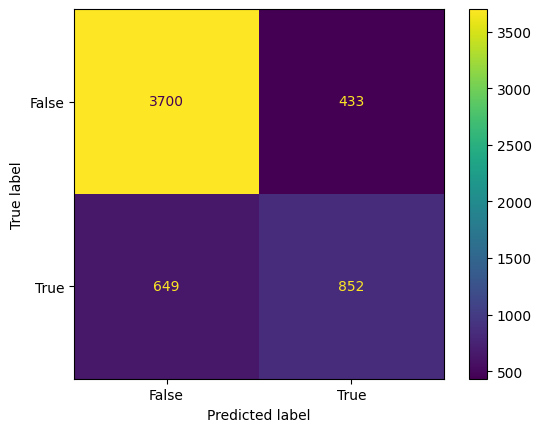

For Test Set:

Macro Score: 0.7212587209685716

Confusion Matrix:


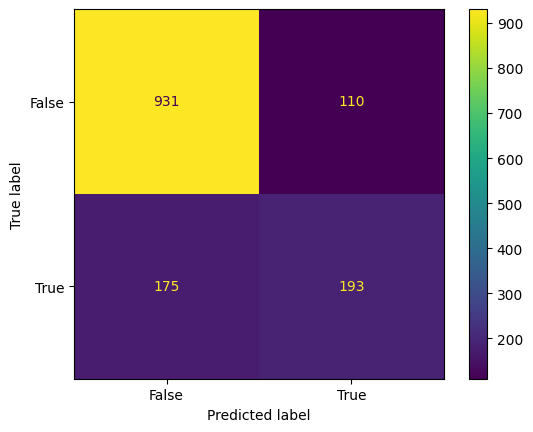


For Model: decision_tree

For Training Set:

Macro F1 Score: 0.7417526116175395

Confusion Matrix:


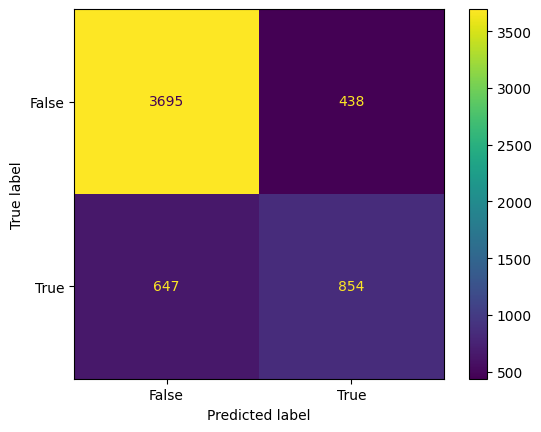

For Test Set:

Macro Score: 0.7098339319252693

Confusion Matrix:


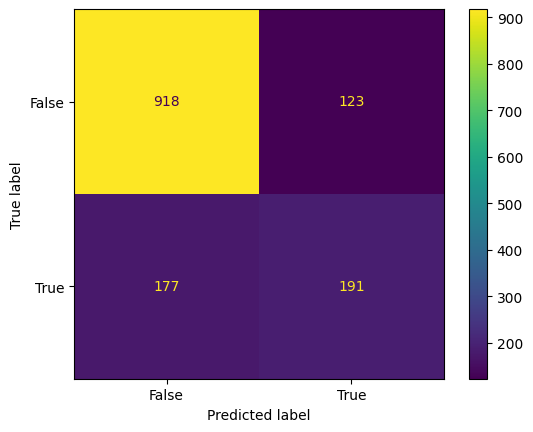


For Model: Random_forest

For Training Set:

Macro F1 Score: 0.6980926225660125

Confusion Matrix:


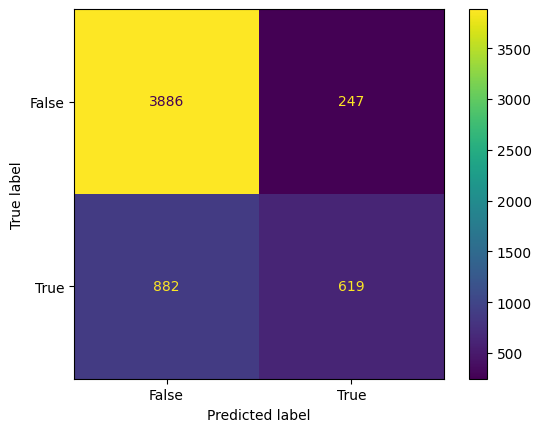

For Test Set:

Macro Score: 0.6622028906089459

Confusion Matrix:


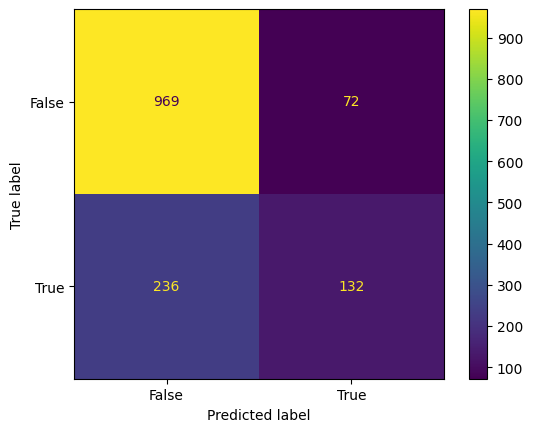


For Model: GBDT

For Training Set:

Macro F1 Score: 0.8136879057641297

Confusion Matrix:


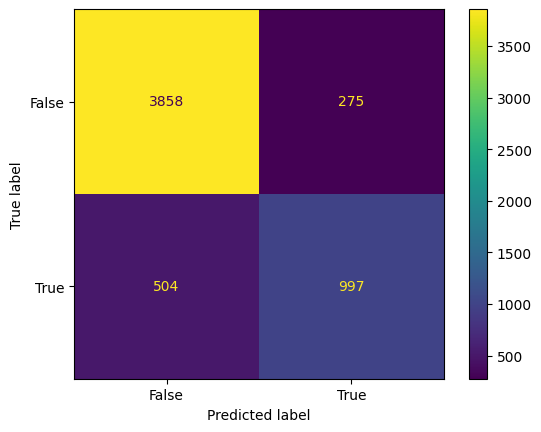

For Test Set:

Macro Score: 0.7019393492739382

Confusion Matrix:


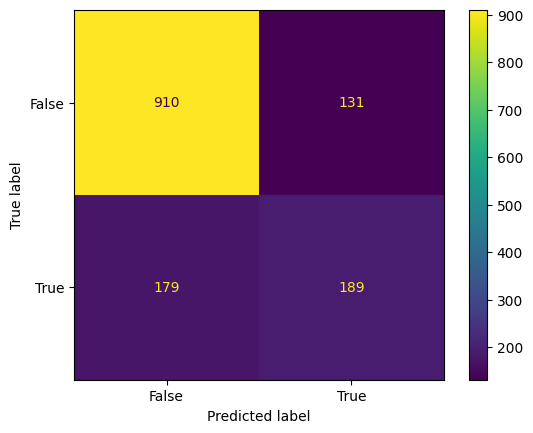


For Model: XGBoost

For Training Set:

Macro F1 Score: 0.9394115369725126

Confusion Matrix:


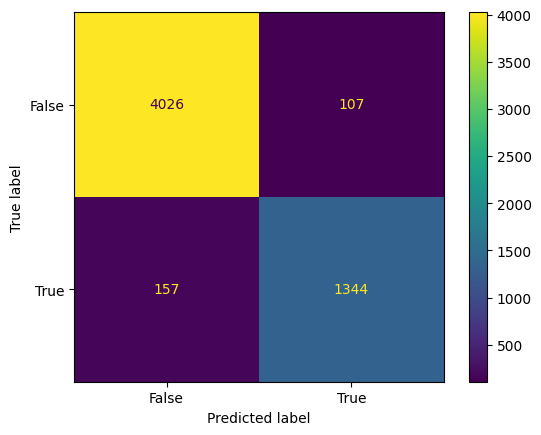

For Test Set:

Macro Score: 0.6979463466788236

Confusion Matrix:


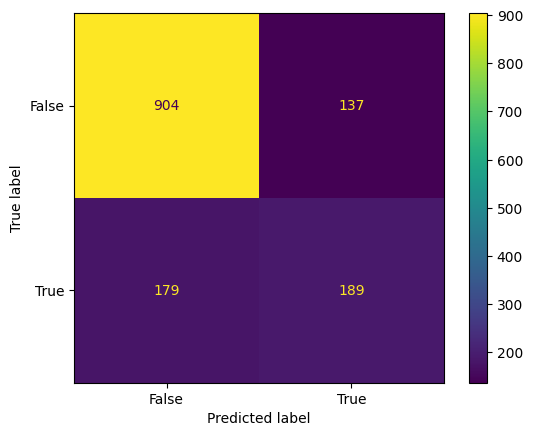


For Model: KNN

For Training Set:

Macro F1 Score: 0.7322283509445565

Confusion Matrix:


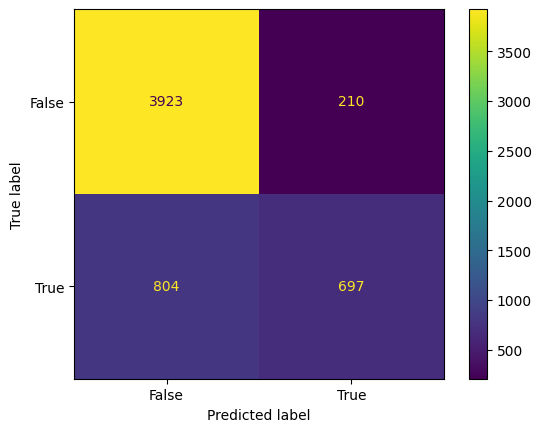

For Test Set:

Macro Score: 0.6610163227966337

Confusion Matrix:


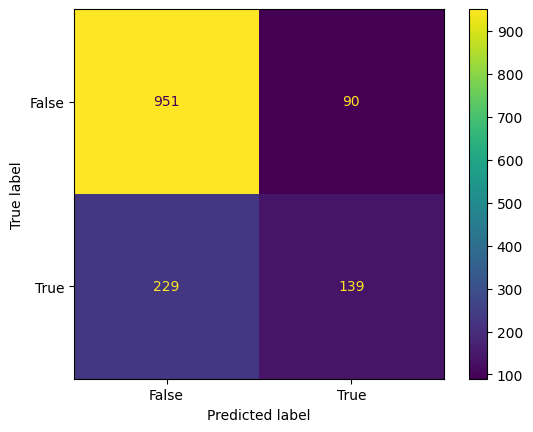


For Model: Gaussian Naive Bayes

For Training Set:

Macro F1 Score: 0.6853794241604667

Confusion Matrix:


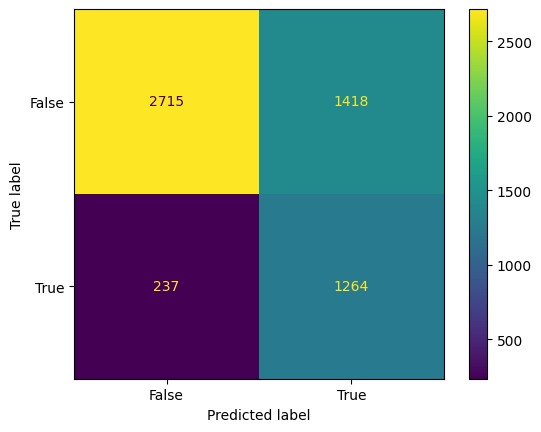

For Test Set:

Macro Score: 0.6691925938519581

Confusion Matrix:


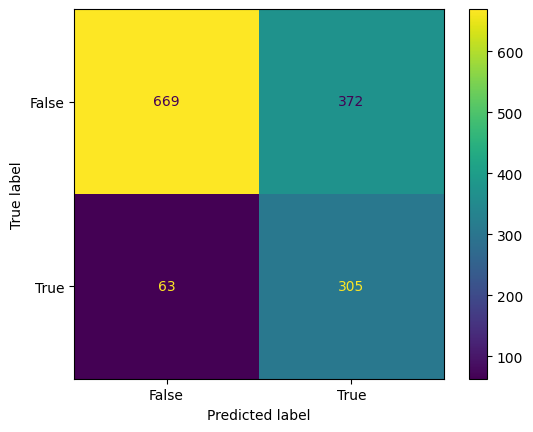


For Model: Radial Support Vector Machines(rbf-SVM)

For Training Set:

Macro F1 Score: 0.9659142192996111

Confusion Matrix:


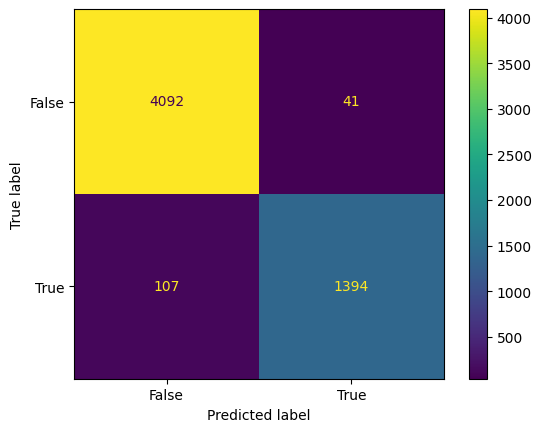

For Test Set:

Macro Score: 0.5466576464116651

Confusion Matrix:


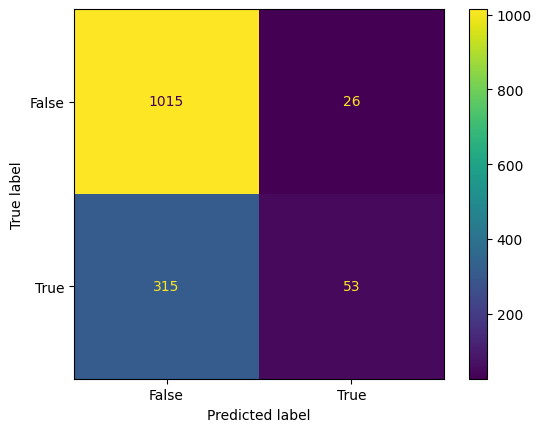

In [121]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix
import sklearn.metrics as metrics

train_scores = [] 
test_scores = [] 
recall_test_scores = []
model_names = list(list_of_models.keys())

for model in model_names:
    print("\nFor Model:", model)
    
    list_of_models[model].fit(x_train, y_train)
    print("\nFor Training Set:")
    y_train_pred = list_of_models[model].predict(x_train)
    
    # Remove 'average' parameter if it's causing issues
    train_ = f1_score(y_train, y_train_pred, average='macro')
    print("\nMacro F1 Score:", train_)
    print("\nConfusion Matrix:") 
    confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
    print("For Test Set:")
    y_test_pred = list_of_models[model].predict(x_test)
    
    test_ = f1_score(y_test, y_test_pred, average='macro')
    print("\nMacro Score:", test_)
    recall_test_score = recall_score(y_test, y_test_pred, average='macro')
    
    print("\nConfusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
    train_scores.append(train_)
    test_scores.append(test_)
    recall_test_scores.append(recall_test_score)

Model Performance Evaluation : Model Selection

In [123]:
res = pd.DataFrame({'model_names' : model_names, 'train_scores' : train_scores, 'test_scores' : test_scores, 'recall_test_scores' : recall_test_scores})
res

model_names  train_scores  test_scores  \
0                      logistic_regression      0.742033     0.721259   
1                            decision_tree      0.741753     0.709834   
2                            Random_forest      0.698093     0.662203   
3                                     GBDT      0.813688     0.701939   
4                                  XGBoost      0.939412     0.697946   
5                                      KNN      0.732228     0.661016   
6                     Gaussian Naive Bayes      0.685379     0.669193   
7  Radial Support Vector Machines(rbf-SVM)      0.965914     0.546658   

   recall_test_scores  
0            0.709394  
1            0.700433  
2            0.644766  
3            0.693873  
4            0.690991  
5            0.645631  
6            0.735728  
7            0.559523

Based on the table, here are the considerations for model selection:

1. Overfitting Analysis:

Radial Support Vector Machines (rbf-SVM) shows very high training scores (0.9659) but a significant drop in test scores (0.5467). This indicates overfitting.
XGBoost and GBDT have smaller gaps between training and test scores, suggesting better generalization compared to rbf-SVM.

2.Generalization Performance:

Logistic Regression has a balanced performance with a test score of 0.7213 and a recall test score of 0.7094. It performs well without significant overfitting.

Decision Tree has slightly lower test scores (0.7098) and recall (0.7004) than Logistic Regression.
Recall Preference:

If recall is the priority, Gaussian Naive Bayes has the highest recall on the test set (0.7357). However, its test score (0.6692) is lower than Logistic Regression.

3.Overall Best Choice:

Logistic Regression provides a good balance of training and test scores with a decent recall test score, making it a suitable candidate for most scenarios.
XGBoost is also a strong contender if slightly higher complexity is acceptable, with a test score of 0.7099 and a recall test score of 0.7033.
<H4>Final Recommendation:</H4>
Logistic Regression is recommended for its simplicity and balanced performance.
If model complexity is not an issue, consider XGBoost for slightly better recall with comparable test scores.

<H4>1. Decision Tree</H4>

A tool to classify complex data

In [124]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [125]:
clf

DecisionTreeClassifier(max_depth=3)

In [126]:
clf.fit(x_train, y_train) 
y_test_pred_DecisionTree = clf.predict(x_test) 

In [127]:
y_test_pred_DecisionTree

array([0., 0., 0., ..., 0., 0., 0.])

In [128]:
output = pd.DataFrame({ 'churn_customers':y_test, 'churn_customers_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output

churn_customers  churn_customers_predicted_by_model
2200              0.0                                 0.0
4627              0.0                                 0.0
3225              0.0                                 0.0
2828              0.0                                 0.0
3768              0.0                                 0.0
...               ...                                 ...
2631              1.0                                 1.0
5333              1.0                                 1.0
6972              1.0                                 0.0
4598              0.0                                 0.0
3065              0.0                                 0.0

[1409 rows x 2 columns]

<H4>Accuracy</H4>

As this is a classification problem, we can use accuracy as our evaluation metric

In [129]:
from sklearn.metrics import accuracy_score 

In [130]:
# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7785663591199432

In [131]:
print('The accuracy on training set of the Decision Tree is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the Decision Tree is {:.3f}'.format(clf.score(x_test,y_test)))

The accuracy on training set of the Decision Tree is 0.792
The accuracy on test set of the Decision Tree is 0.779


<H4>Plotting The Tree</H4>

In [132]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [133]:
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns,['NoChurn', 'Churn'])

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [134]:
df = pd.DataFrame({'max_depth':[None], 'accuracy_score':[None]})

i = 1

for v in range(1,1410):
    clf = DecisionTreeClassifier(max_depth=v)
    clf.fit(x_train, y_train)
    y_test_pred_DecisionTree = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
    df.loc[i] = [v,test_acc]
    i += 1

df.drop([0], inplace=True)
df.reset_index(inplace = True, drop=True)

df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\3745705358.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[i] = [v,test_acc]


max_depth  accuracy_score
0           1.0        0.738822
1           2.0        0.758694
2           3.0        0.778566
3           4.0        0.775727
4           5.0        0.787083
...         ...             ...
1404     1405.0        0.716111
1405     1406.0        0.716820
1406     1407.0        0.723918
1407     1408.0        0.718950
1408     1409.0        0.725337

[1409 rows x 2 columns]

In [136]:
print(df.accuracy_score.max())
df.loc[df.accuracy_score == df.accuracy_score.max()]

0.78708303761533


max_depth  accuracy_score
4        5.0        0.787083

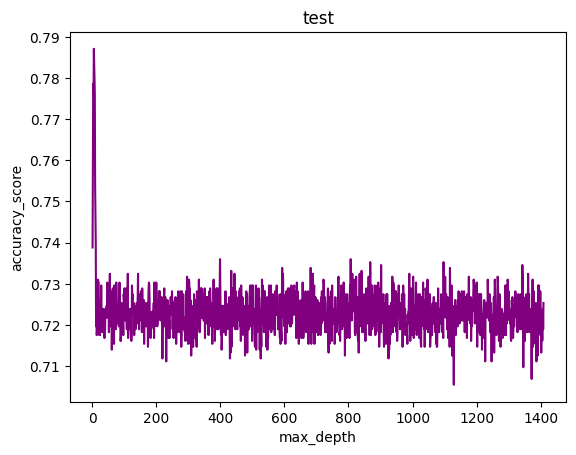

In [141]:
plt.plot(df.max_depth, df.accuracy_score,color='purple')
plt.title('test')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.show()

In [137]:
df_train = pd.DataFrame({'max_depth':[None], 'accuracy_score':[None]})

i = 1

for v in range(1,1410):
    clf = DecisionTreeClassifier(max_depth=v)
    clf.fit(x_train, y_train)
    y_train_pred_DecisionTree = clf.predict(x_train)
    test_acc = accuracy_score(y_train, y_train_pred_DecisionTree)
    df_train.loc[i] = [v,test_acc]
    i += 1

df_train.drop([0], inplace=True)
df_train.reset_index(inplace = True, drop=True)

df_train

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11548\1715331002.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_train.loc[i] = [v,test_acc]


max_depth  accuracy_score
0           1.0        0.733582
1           2.0        0.763401
2           3.0        0.792332
3           4.0        0.799610
4           5.0        0.807419
...         ...             ...
1404     1405.0        0.997515
1405     1406.0        0.997515
1406     1407.0        0.997515
1407     1408.0        0.997515
1408     1409.0        0.997515

[1409 rows x 2 columns]

In [142]:
print(df_train.accuracy_score.max())
df_train.loc[df_train.accuracy_score == df_train.accuracy_score.max()]

0.997515086971956


max_depth  accuracy_score
23         24.0        0.997515
24         25.0        0.997515
25         26.0        0.997515
26         27.0        0.997515
27         28.0        0.997515
...         ...             ...
1404     1405.0        0.997515
1405     1406.0        0.997515
1406     1407.0        0.997515
1407     1408.0        0.997515
1408     1409.0        0.997515

[1386 rows x 2 columns]

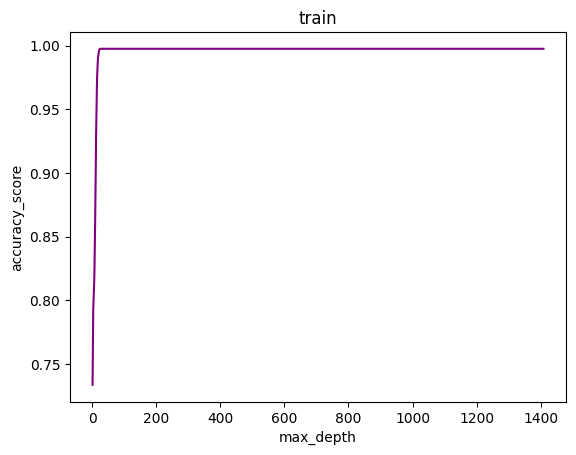

In [143]:
plt.plot(df_train.max_depth, df_train.accuracy_score,color='purple')
plt.title('train')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.show()

<H4>2.Random Forest model</H4>

In [144]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


In [145]:
model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test)

In [146]:
output = pd.DataFrame({ 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest})
output

churn_what_actualy_happened  churn_predicted_by_model
2200                          0.0                       0.0
4627                          0.0                       0.0
3225                          0.0                       0.0
2828                          0.0                       0.0
3768                          0.0                       0.0
...                           ...                       ...
2631                          1.0                       1.0
5333                          1.0                       1.0
6972                          1.0                       0.0
4598                          0.0                       0.0
3065                          0.0                       1.0

[1409 rows x 2 columns]

In [147]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc
print('The accuracy of the Random Forests is',{test_acc})

The accuracy of the Random Forests is {0.794889992902768}


In [148]:
print('The accuracy on training set of the Random Forests is {:.3f}'.format(model.score(x_train,y_train)))
print('The accuracy on test set of the Random Forests is {:.3f}'.format(model.score(x_test,y_test)))

The accuracy on training set of the Random Forests is 0.875
The accuracy on test set of the Random Forests is 0.795


<H4>Random Forest Feature Importance</H4>

In [149]:
feature_importances = model.feature_importances_ 
feature_importances

array([0.0118709 , 0.14737972, 0.09265507, 0.13028509, 0.01030129,
       0.01041355, 0.00990754, 0.00909203, 0.01079093, 0.00983523,
       0.00322993, 0.00349593, 0.00957754, 0.00301478, 0.01097172,
       0.01265854, 0.04798938, 0.00486522, 0.04797124, 0.00360838,
       0.01272762, 0.01902811, 0.00169343, 0.01244648, 0.01525639,
       0.00337061, 0.0082366 , 0.04007   , 0.0061918 , 0.01327373,
       0.00815346, 0.0043405 , 0.01018353, 0.00825539, 0.01034661,
       0.0085721 , 0.08846243, 0.01361008, 0.03005254, 0.0140427 ,
       0.01137548, 0.00905439, 0.01128076, 0.04184632, 0.00821493])

In [150]:
features = x_train.columns 
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.sort_values('importance', ascending=False) 

feature  importance
1                                    tenure    0.147380
3                              totalcharges    0.130285
2                            monthlycharges    0.092655
36                  contract_Month-to-month    0.088462
16              internetservice_Fiber optic    0.047989
18                        onlinesecurity_No    0.047971
43           paymentmethod_Electronic check    0.041846
27                           techsupport_No    0.040070
38                        contract_Two year    0.030053
21                          onlinebackup_No    0.019028
24                      deviceprotection_No    0.015256
39                      paperlessbilling_No    0.014043
37                        contract_One year    0.013610
29                          techsupport_Yes    0.013274
20                       onlinesecurity_Yes    0.012728
15                      internetservice_DSL    0.012659
23                         onlinebackup_Yes    0.012446
0                             seniorcitizen    0.011871
40                     paperlessbilling_Yes    0.011375
42    paymentmethod_Credit card (automatic)    0.011281
14                        multiplelines_Yes    0.010972
8                             dependents_No    0.010791
5                               gender_Male    0.010414
34      streamingmovies_No internet service    0.010347
4                             gender_Female    0.010301
32                          streamingtv_Yes    0.010184
6                                partner_No    0.009908
9                            dependents_Yes    0.009835
12                         multiplelines_No    0.009578
7                               partner_Yes    0.009092
41  paymentmethod_Bank transfer (automatic)    0.009054
35                      streamingmovies_Yes    0.008572
33                       streamingmovies_No    0.008255
26                     deviceprotection_Yes    0.008237
44               paymentmethod_Mailed check    0.008215
30                           streamingtv_No    0.008153
28          techsupport_No internet service    0.006192
17                       internetservice_No    0.004865
31          streamingtv_No internet service    0.004340
19       onlinesecurity_No internet service    0.003608
11                         phoneservice_Yes    0.003496
25     deviceprotection_No internet service    0.003371
10                          phoneservice_No    0.003230
13           multiplelines_No phone service    0.003015
22         onlinebackup_No internet service    0.001693

In [151]:
stats.importance.sum()

np.float64(1.0)

Let's plot the features

Text(0.5, 1.0, 'Feature Importance of Random Forest')

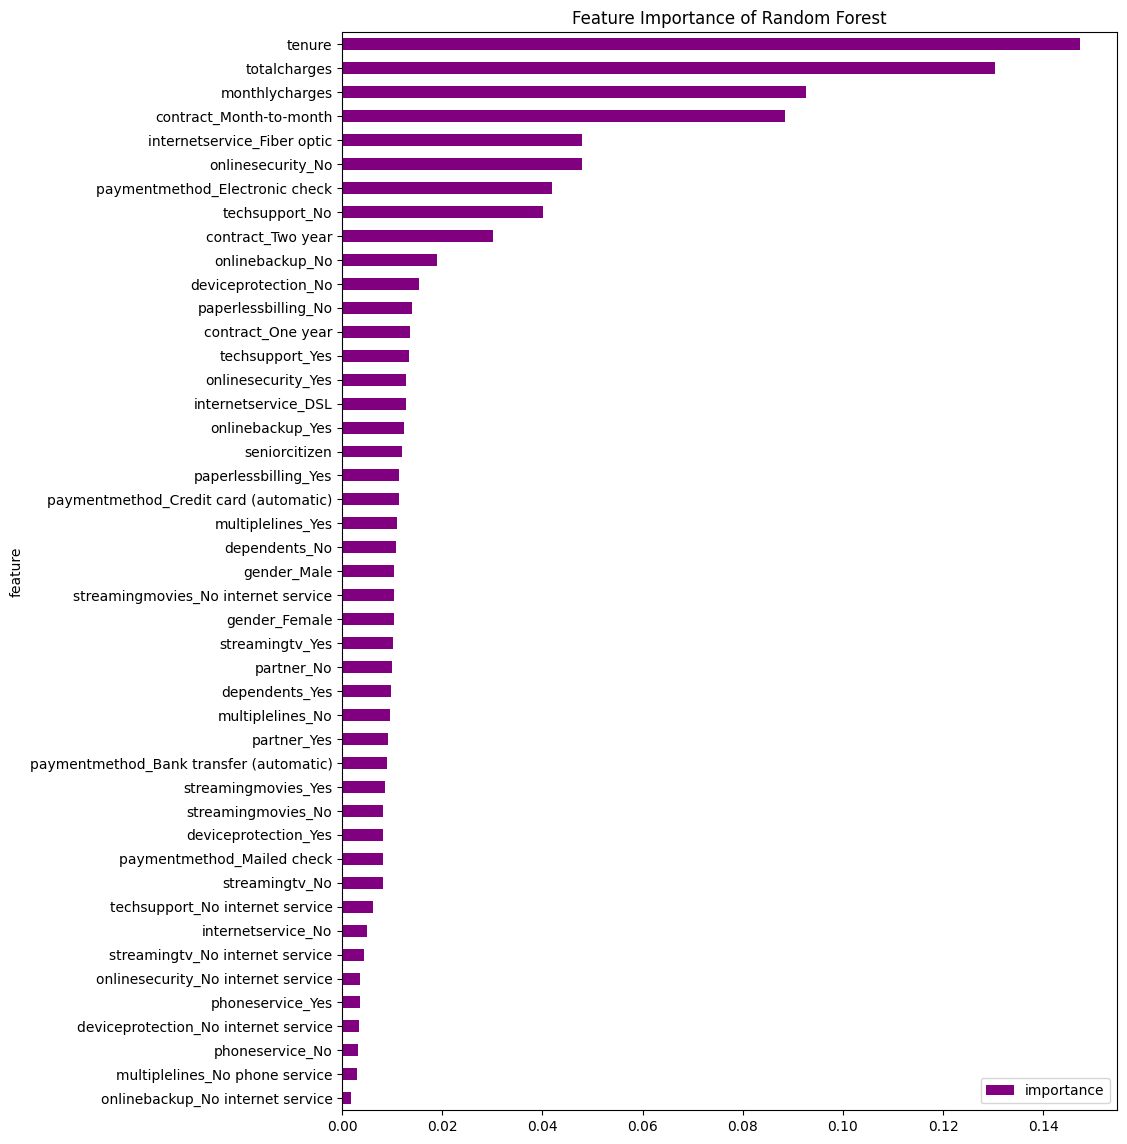

In [152]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh',figsize=(10, 14),color='purple')         
plt.title('Feature Importance of Random Forest')

In [153]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(x_test))

array([[936, 105],
       [184, 184]])

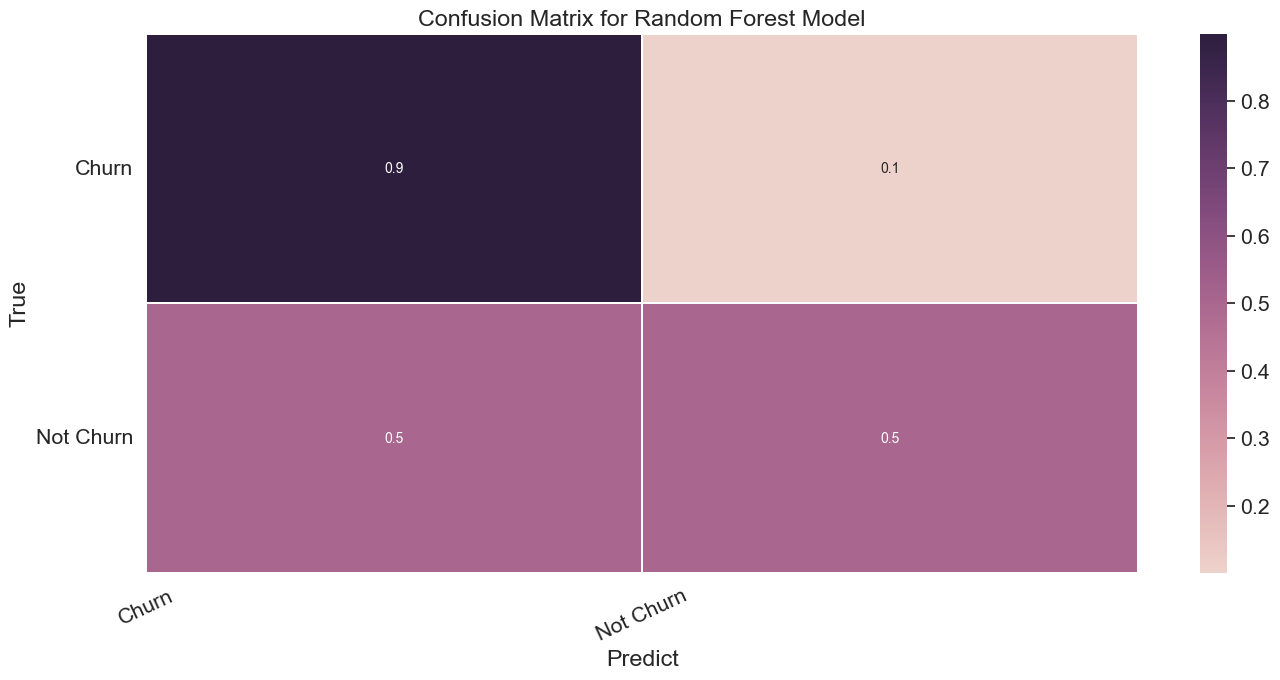

In [154]:
matrix = confusion_matrix(y_test, model.predict(x_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
             linewidths=0.2, cmap=sns.cubehelix_palette(as_cmap=True))

# Add labels to the plot
class_names = ['Churn', 'Not Churn']              
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1041
         1.0       0.64      0.50      0.56       368

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



This is pretty aligned with what we saw in the correlations, so seems like the algorithm found the right patterns

<H4>3. KNN - K Nearest Neighbors</H4>

In [156]:
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train, y_train) 
y_test_pred_Knn = clf.predict(x_test) 
output = pd.DataFrame({ 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output

churn_what_actualy_happened  churn_predicted_by_model
2200                          0.0                       0.0
4627                          0.0                       0.0
3225                          0.0                       0.0
2828                          0.0                       0.0
3768                          0.0                       0.0
...                           ...                       ...
2631                          1.0                       1.0
5333                          1.0                       1.0
6972                          1.0                       0.0
4598                          0.0                       0.0
3065                          0.0                       0.0

[1409 rows x 2 columns]

In [157]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc
print('The accuracy of the KNN is',{test_acc})

The accuracy of the KNN is {0.7735982966643009}


In [158]:
print('The accuracy on training set of the KNN model is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the  KNN model is {:.3f}'.format(clf.score(x_test,y_test)))

The accuracy on training set of the KNN model is 0.820
The accuracy on test set of the  KNN model is 0.774


Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Lets check the accuracies over various values of n_neighbours.

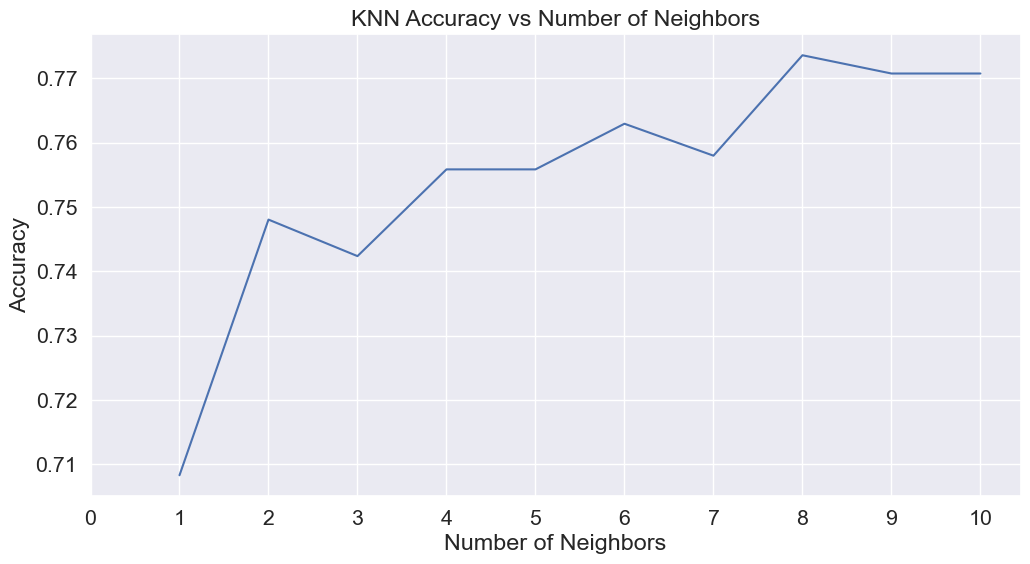

Accuracies for different values of n are: [0.70830376 0.74804826 0.74237048 0.75585522 0.75585522 0.76295245
 0.75798439 0.7735983  0.7707594  0.7707594 ] with the max value as 0.7735982966643009


In [159]:
a = []
a_index = list(range(1, 11))

for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    a.append(metrics.accuracy_score(y_test, prediction))

# Convert to pandas Series after collecting results
a = pd.Series(a)

plt.figure(figsize=(12, 6))
plt.plot(a_index, a)
plt.xticks(range(11))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.show()

print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

The best n_neighbors=8!

<H4>Overfitting</H4>

<H4>Overfitting in Knn</H4>

In [160]:

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc
print('The accuracy of the KNN is',{test_acc})

The accuracy of the KNN is {0.7423704755145494}


In [161]:
print('The accuracy on training set of the KNN model is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the  KNN model is {:.3f}'.format(clf.score(x_test,y_test)))

The accuracy on training set of the KNN model is 0.862
The accuracy on test set of the  KNN model is 0.742


In [162]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc
print('The accuracy of the KNN is',{test_acc})

The accuracy of the KNN is {0.7579843860894251}


In [163]:
print('The accuracy on training set of the KNN model is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the  KNN model is {:.3f}'.format(clf.score(x_test,y_test)))

The accuracy on training set of the KNN model is 0.822
The accuracy on test set of the  KNN model is 0.758


In [164]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc
print('The accuracy of the KNN is',{test_acc})

The accuracy of the KNN is {0.7735982966643009}


In [165]:
print('The accuracy on training set of the KNN model is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the  KNN model is {:.3f}'.format(clf.score(x_test,y_test)))

The accuracy on training set of the KNN model is 0.820
The accuracy on test set of the  KNN model is 0.774


- **Classification report**

In [166]:
y_pred = clf.predict(x_test)

In [167]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.81      0.91      0.86      1041
         Yes       0.61      0.38      0.47       368

    accuracy                           0.77      1409
   macro avg       0.71      0.65      0.66      1409
weighted avg       0.75      0.77      0.75      1409



In [168]:
clf = KNeighborsClassifier(n_neighbors=33)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc
print('The accuracy of the KNN is',{test_acc})

The accuracy of the KNN is {0.7707594038325053}


In [169]:
print('The accuracy on training set of the KNN model is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the  KNN model is {:.3f}'.format(clf.score(x_test,y_test)))

The accuracy on training set of the KNN model is 0.795
The accuracy on test set of the  KNN model is 0.771


In [170]:
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc
print('The accuracy of the KNN is',{test_acc})

The accuracy of the KNN is {0.765791341376863}


In [171]:
print('The accuracy on training set of the KNN model is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the  KNN model is {:.3f}'.format(clf.score(x_test,y_test)))

The accuracy on training set of the KNN model is 0.780
The accuracy on test set of the  KNN model is 0.766


Seems like the algorithm overfits a bit, also we know that KNN can highly suffer from features that are in different scales. So let's scale the x values first

In [172]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test) 

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)

output = pd.DataFrame({ 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn, 'churn_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) 

test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc
print('The accuracy of the KNN is',{test_acc})

The accuracy of the KNN is {0.7558552164655784}


In [173]:
print('The accuracy on training set of the KNN model is {:.3f}'.format(clf.score(x_train,y_train)))
print('The accuracy on test set of the  KNN model is {:.3f}'.format(clf.score(x_test,y_test)))

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


The accuracy on training set of the KNN model is 0.734
The accuracy on test set of the  KNN model is 0.739


C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


<H4>4. Evaluation + Benchmark</H4>

In [174]:
y_train.value_counts()

churn
0.0    4133
1.0    1501
Name: count, dtype: int64

In [176]:
import numpy as np
np.ones(80)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [177]:

def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value

In [178]:
benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Not churn

array([0., 0., 0., ..., 0., 0., 0.])

In [179]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc
print('The accuracy on test set of the Benchmark is',{test_acc})

The accuracy on test set of the Benchmark is {0.7388218594748048}


In [180]:
y_train_pred_Benchmark = get_benchmark_predictions(x_train, benchmark_value)
y_train_pred_Benchmark

array([0., 0., 0., ..., 0., 0., 0.])

In [181]:
train_acc = accuracy_score(y_train, y_train_pred_Benchmark)
train_acc
print('The accuracy on training set of the Benchmark is',{train_acc})

The accuracy on training set of the Benchmark is {0.7335818246361377}


<H4>5. Gaussian Naive Bayes</H4>

In [182]:
model_Naive=GaussianNB()
model_Naive.fit(x_train,y_train)
prediction6=model_Naive.predict(x_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.6912704045422285


In [184]:
print('The accuracy on training set of the NaiveBayes model is {:.3f}'.format(model_Naive.score(x_train,y_train)))
print('The accuracy on test set of the  NaiveBayes model is {:.3f}'.format(model_Naive.score(x_test,y_test)))

The accuracy on training set of the NaiveBayes model is 0.706
The accuracy on test set of the  NaiveBayes model is 0.691


<H4>6. Radial Support Vector Machines(rbf-SVM)</H4>

In [183]:
rsvm=svm.SVC(kernel='rbf',C=1,gamma=0.1)
rsvm.fit(x_train,y_train)
prediction_rsvm=rsvm.predict(x_test)
test_rsvm = accuracy_score(y_test, prediction_rsvm)
print('Accuracy for rbf SVM is ',{test_rsvm})

Accuracy for rbf SVM is  {0.7579843860894251}


In [185]:
print('The accuracy on training set of the Radial Support Vector Machines model is {:.3f}'.format(rsvm.score(x_train,y_train)))
print('The accuracy on test set of the  Radial Support Vector Machines model is {:.3f}'.format(rsvm.score(x_test,y_test)))

The accuracy on training set of the Radial Support Vector Machines model is 0.974
The accuracy on test set of the  Radial Support Vector Machines model is 0.758


<H4>7. Logistic Regression</H4>

In [186]:
from sklearn.linear_model import LogisticRegression
model_logReg= LogisticRegression(C=200, max_iter=1000)

scores = cross_val_score(model_logReg, x_train, y_train, cv=10, scoring="f1")
print(scores)
model_logReg.fit(x_train, y_train)

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

[0.63194444 0.64084507 0.55252918 0.61254613 0.58302583 0.63265306
 0.57246377 0.56842105 0.625      0.63799283]


LogisticRegression(C=200, max_iter=1000)

**Testing the model**

In [187]:
log_pred = model_logReg.predict(x_test)

 **Confusion matrix**

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

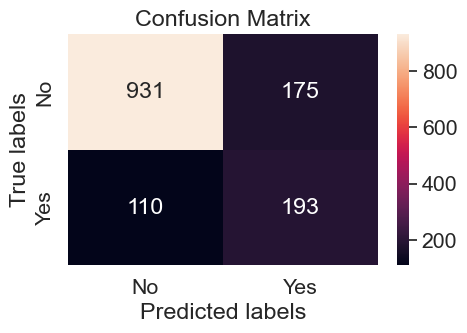

In [188]:
cm = confusion_matrix(log_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [189]:
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1041
         Yes       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [190]:
test_log = accuracy_score(y_test, log_pred)
print('Accuracy for  Logistic Regression is ',{test_log})

Accuracy for  Logistic Regression is  {0.7977288857345636}


In [191]:
print('The accuracy on training set of the Logistic Regression model is {:.3f}'.format(model_logReg.score(x_train,y_train)))
print('The accuracy on test set of the  Logistic Regression model is {:.3f}'.format(model_logReg.score(x_test,y_test)))

The accuracy on training set of the Logistic Regression model is 0.808
The accuracy on test set of the  Logistic Regression model is 0.798


<H4>8.XGBClassifier</H4>

In [192]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(x_train, y_train)

xgb_y_predict = xgb_model.predict(x_test)
xgb_score = accuracy_score(xgb_y_predict, y_test)
print('The accuracy on training set of the XGBClassifier model is {:.3f}'.format(xgb_model.score(x_train,y_train)))
print('The accuracy on test set of the  XGBClassifier model is {:.3f}'.format(xgb_model.score(x_test,y_test)))

The accuracy on training set of the XGBClassifier model is 0.943
The accuracy on test set of the  XGBClassifier model is 0.783


<H4>9.GradientBoostingClassifier</H4>

In [193]:
GBDT_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 4, random_state = 42).fit(x_train, y_train)

GBDT_y_predict = GBDT_model.predict(x_test)
GBDT_score = accuracy_score(GBDT_y_predict, y_test)
print('The accuracy on training set of the GBDT model is {:.3f}'.format(GBDT_model.score(x_train,y_train)))
print('The accuracy on test set of the  GBDT model is {:.3f}'.format(GBDT_model.score(x_test,y_test)))

The accuracy on training set of the GBDT model is 0.862
The accuracy on test set of the  GBDT model is 0.780


<H4>Plot the best accuracy for all algorithms (train & test)</H4>

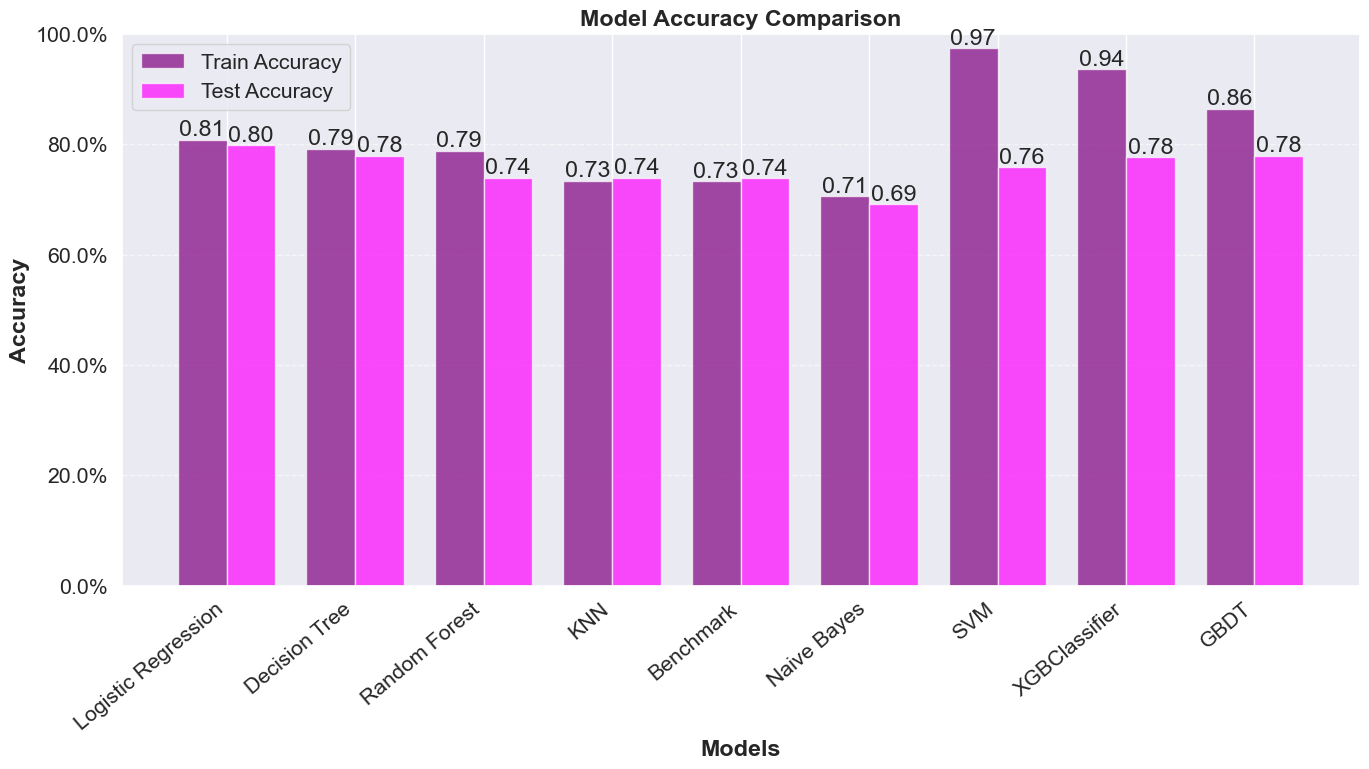

In [194]:
def plot_model_accuracies(models, train_accuracies, test_accuracies):
    """
    Plot train and test accuracies for multiple models.
    
    Parameters:
    - models: List of model names
    - train_accuracies: List of training accuracies
    - test_accuracies: List of test accuracies
    """
   
    plt.figure(figsize=(14, 8))

    bar_width = 0.38
    index = np.arange(len(models))
    
    plt.bar(index, train_accuracies, bar_width, label='Train Accuracy', color='purple', alpha=0.7)
    plt.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy', color='magenta', alpha=0.7)
    
    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('Accuracy', fontweight='bold')
    plt.title('Model Accuracy Comparison', fontweight='bold')
    plt.xticks(index + bar_width/2, models, rotation=40, ha='right')
    
    plt.ylim(0, 1)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    
    for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
        plt.text(i, train_acc, f'{train_acc:.2f}', ha='center', va='bottom')
        plt.text(i + bar_width, test_acc, f'{test_acc:.2f}', ha='center', va='bottom')
    
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.show()


models = [
    'Logistic Regression', 
    'Decision Tree', 
    'Random Forest', 
    'KNN',
    'Benchmark',
    'Naive Bayes', 
    'SVM',
    'XGBClassifier',
    'GBDT'
    
]

train_accuracies = [
    0.808,  # Logistic Regression
    0.792,  # Decision Tree
    0.788,  # Random Forest
    0.734,  # KNN
    0.733,  # Benchmark
    0.706,  # Naive Bayes
    0.974,  # SVM
    0.936 , #XGBC
    0.864   #GBDT
]

test_accuracies = [
    0.798,  # Logistic Regression
    0.779,  # Decision Tree
    0.739,  # Random Forest
    0.739,  # KNN
    0.738,  # Benchmark
    0.691,  # Naive Bayes
    0.758,  # SVM
    0.776,  #XGBC
    0.779   #GBDT
]

plot_model_accuracies(models, train_accuracies, test_accuracies)

From the graph provided, here’s an analysis of train vs. test accuracies to check for overfitting and consistency:<br>

<h4>Logistic Regression:</h4><br><ol>
Train Accuracy: 80.8%<br>
Test Accuracy: 79.8%<br>
The accuracies are very close, indicating the model generalizes well and is not overfitting.<br></ol>
<h4>Decision Tree:<br></h4><ol>
Train Accuracy: 79.2%<br>
Test Accuracy: 77.9%<br>
The difference is minimal, suggesting the model is well-balanced.<br></ol>
<h4>Random Forest:</h4><br><ol>
Train Accuracy: 78.8%<br>
Test Accuracy: 73.9%<br>
There is a slight drop in test accuracy, but it’s still fairly consistent, suggesting moderate generalization.<br></ol>
<h4>KNN (K-Nearest Neighbors):</h4><br><ol>
Train Accuracy: 73.4%<br>
Test Accuracy: 73.9%<br>
The train and test accuracies are nearly identical, showing excellent generalization.<br></ol>
<h4>Benchmark:</h4><br><ol>
Train Accuracy: 73.3%<br>
Test Accuracy: 73.8%<br>
Similar to KNN, this model is generalized well with consistent performance.<br></ol>
<h4>Naive Bayes:</h4><br><ol>
Train Accuracy: 70.6%<br>
Test Accuracy: 69.1%<br>
The performance is consistent but on the lower side compared to other models.<br></ol>
<h4>SVM (Support Vector Machine):</h4><br><ol>
Train Accuracy: 97.4%<br>
Test Accuracy: 75.8%<br>
The significant gap between train and test accuracy shows clear overfitting.<br>
SVM is likely too complex for the dataset and should not be prioritized unless this issue is resolved.</ol>
<h4>XGBClassifier:</h4><br><ol>

Train Accuracy: 93.6%<br>
Test Accuracy: 77.6%<br>
XGBoost exhibits some overfitting but achieves strong accuracy on the test set.<br>
With proper parameter tuning (e.g., regularization, tree depth control), this model has high potential for churn prediction.<br></ol>
<h4>GBDT:</h4><br><ol>

Train Accuracy: 86.4%<br>
Test Accuracy: 77.9%<br>
GBDT has a good balance of train and test accuracy with minor overfitting.<br>
It is a strong contender for churn prediction due to its interpretability and performance.<br></ol>



<h4>Recommendation for Churn Prediction:</h4>
<h4>Logistic Regression:</h4><br><ol>

Best choice for simplicity and consistent performance.<br>
Ideal if interpretability is a priority.</ol>
<h4>XGBoost or GBDT:</h4><br><ol>

These models should be preferred if you seek better performance with slightly higher complexity.<br>
Parameter tuning is essential to reduce overfitting and maximize generalization.</ol>
<h4>Avoid:</h4><br><ol>

SVM: Due to severe overfitting.<br>
Naive Bayes: Due to low accuracy.</ol>

<H4>Best max depth and estimators for Classifiers!</H4>

In [293]:
from sklearn.model_selection import GridSearchCV

In [195]:
models = {
    'decision_tree' : DecisionTreeClassifier( random_state = 42),
    'Random_forest' : RandomForestClassifier(random_state = 42),
    'GBDT' : GradientBoostingClassifier( random_state = 42),
    "XGBoost" : XGBClassifier( random_state = 42),
    
}

In [196]:
hyperparameters = {
    "Random_forest" :{
        "n_estimators": [50,100, 150],
        "max_depth": [4,  10, None],
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    },
    "decision_tree":{
        "max_depth": [3, 5, 7],
    },
    "GBDT":{
       "n_estimators": [50,100, 150],
        "max_depth": [4, 5, 7],
    }
}

In [197]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(x_train, y_train)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")

Tunning decision_tree......


NameError: name 'GridSearchCV' is not defined